## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 

In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

In [7]:
#pip install xgboost
# conda install py-xgboost

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from collections import Counter


## Exploratory data analysis

In [9]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
#observe the different feature type present in the data
print(df.dtypes)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Here we will observe the distribution of our classes

**Checking Missing Values**

In [14]:
# Checking for the missing value present in each columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


Since the data is PCA transformed all features are expected to normally distributed. The data does not have any null value. Each feature has 284807 observations.
 
The datatype of the 'Class' variable is int. (0: non fraud & 1:fraud)

In [15]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
normal_share,fraud_share

(99.82725143693798, 0.1727485630620034)

The data is imbalanced. Only 0.172% of total cases are positive.

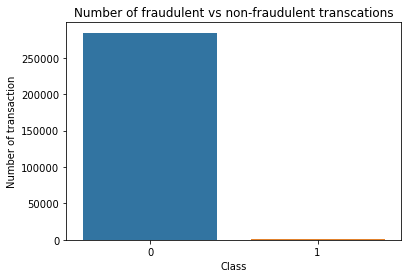

In [16]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Number of fraudulent vs non-fraudulent transcations")
plt.show()


Text(0.5, 1.0, 'Percentage of fraudulent vs non-fraudulent transcations')

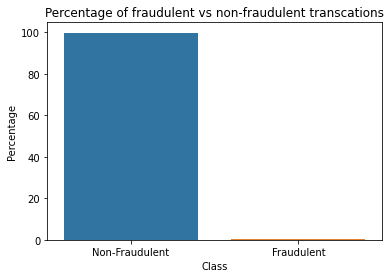

In [17]:
# Create a bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

The no. of fraudulent cases are quite insignificant compared to the non-fraudulent cases. This dataset is a highly unbalnced .

In [18]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]
print(data_fraud.shape)
print(data_non_fraud.shape)

(492, 31)
(284315, 31)


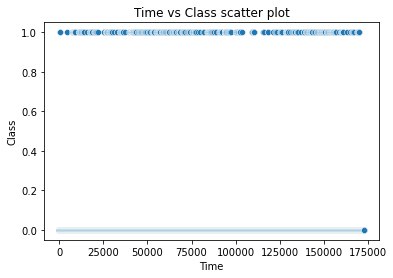

In [19]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

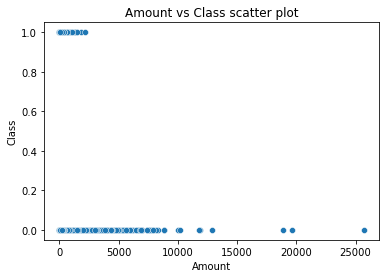

In [20]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

The fraudulent transactions do not have any high amount transactions. The maximum amount for a fraudulent transaction is somewhere around $2600.

The Time column  doesn't seem to have any role in deciding whether a transaction is fraud or not.

In [21]:
#  Drop unnecessary columns
# Dropping the column 'Time' since it does not have any impact on deciding a fraud transaction
df = df.drop("Time", axis = 1)

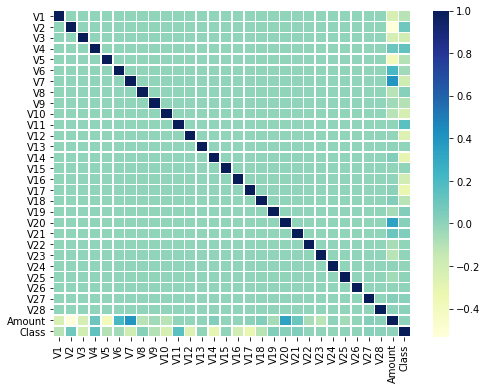

In [22]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

V7 and V20 seem to have positive correlation with the feature 'Amount'.

### Splitting the data into train & test data

In [23]:
y = df['Class'] # Putting target variable to y
X = df.drop(['Class'], axis=1) # Putting feature variables into X

In [24]:

# Spltting the into  train test size (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [25]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


Feature Scaling:


In [26]:
# We are scaling only Amount field as PCA is already performed on all other column in the dataset .

In [27]:
scaler = StandardScaler()

In [28]:
# Transform the train set
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [29]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [30]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### Plotting the distribution of a variable

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
colum = X_train.columns
colum

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [32]:
 def plot_dist():
    plt.figure(figsize=(22,32))
    i=0
    for col in colum:
        i += 1
        plt.subplot(6,5, i)
        sns.distplot(X_train[col])
        plt.title(col+' '+str(X_train[col].skew()))
    plt.show()   


  

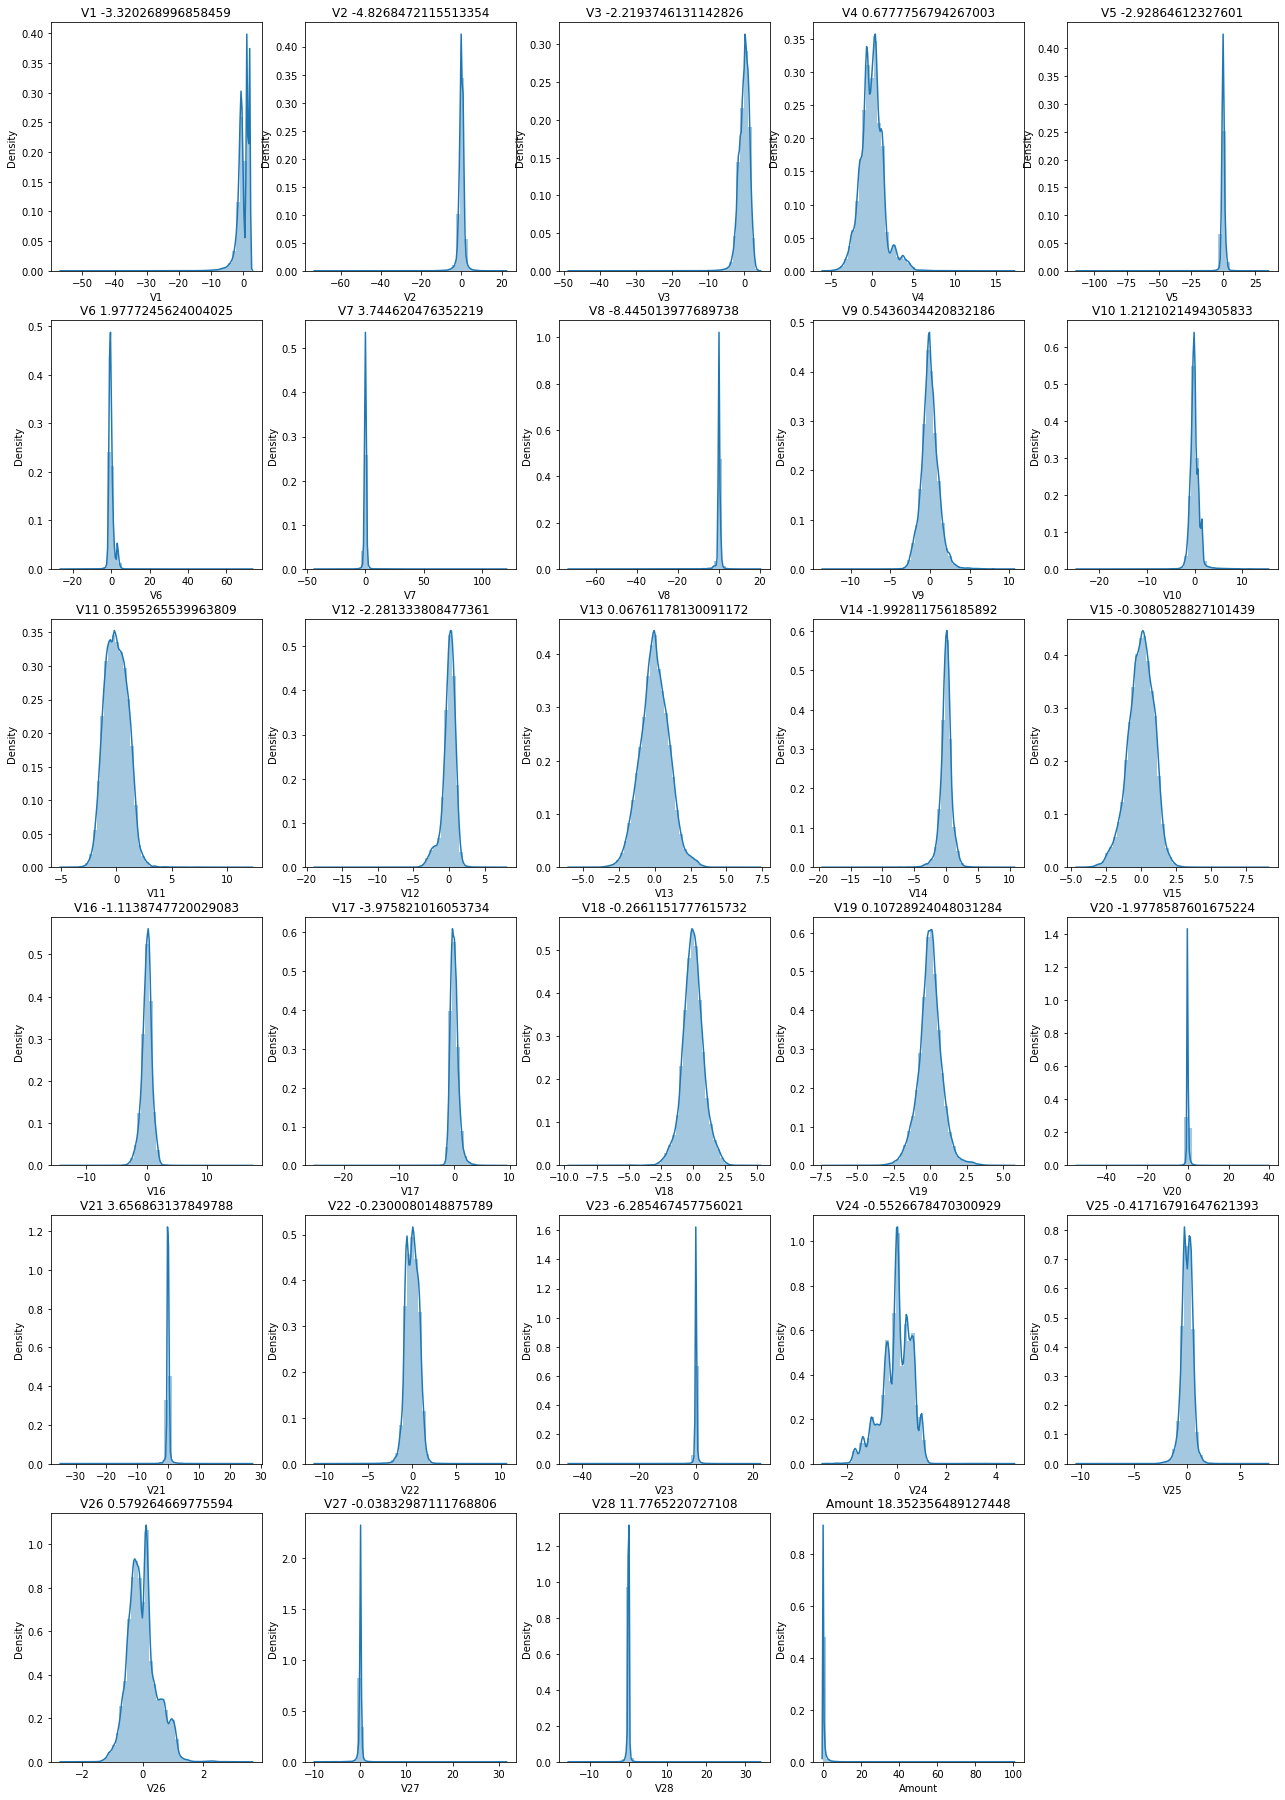

In [33]:
plot_dist()

We plotted distribution plots for all the variables and it is clear that there are some variables which are skewed either towards left or right.


We must transform the data to normally distributed and remove the skewness

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [34]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[colum] = pt.fit_transform(X_train)


# Transforming the test data
X_test[colum] = pt.transform(X_test)

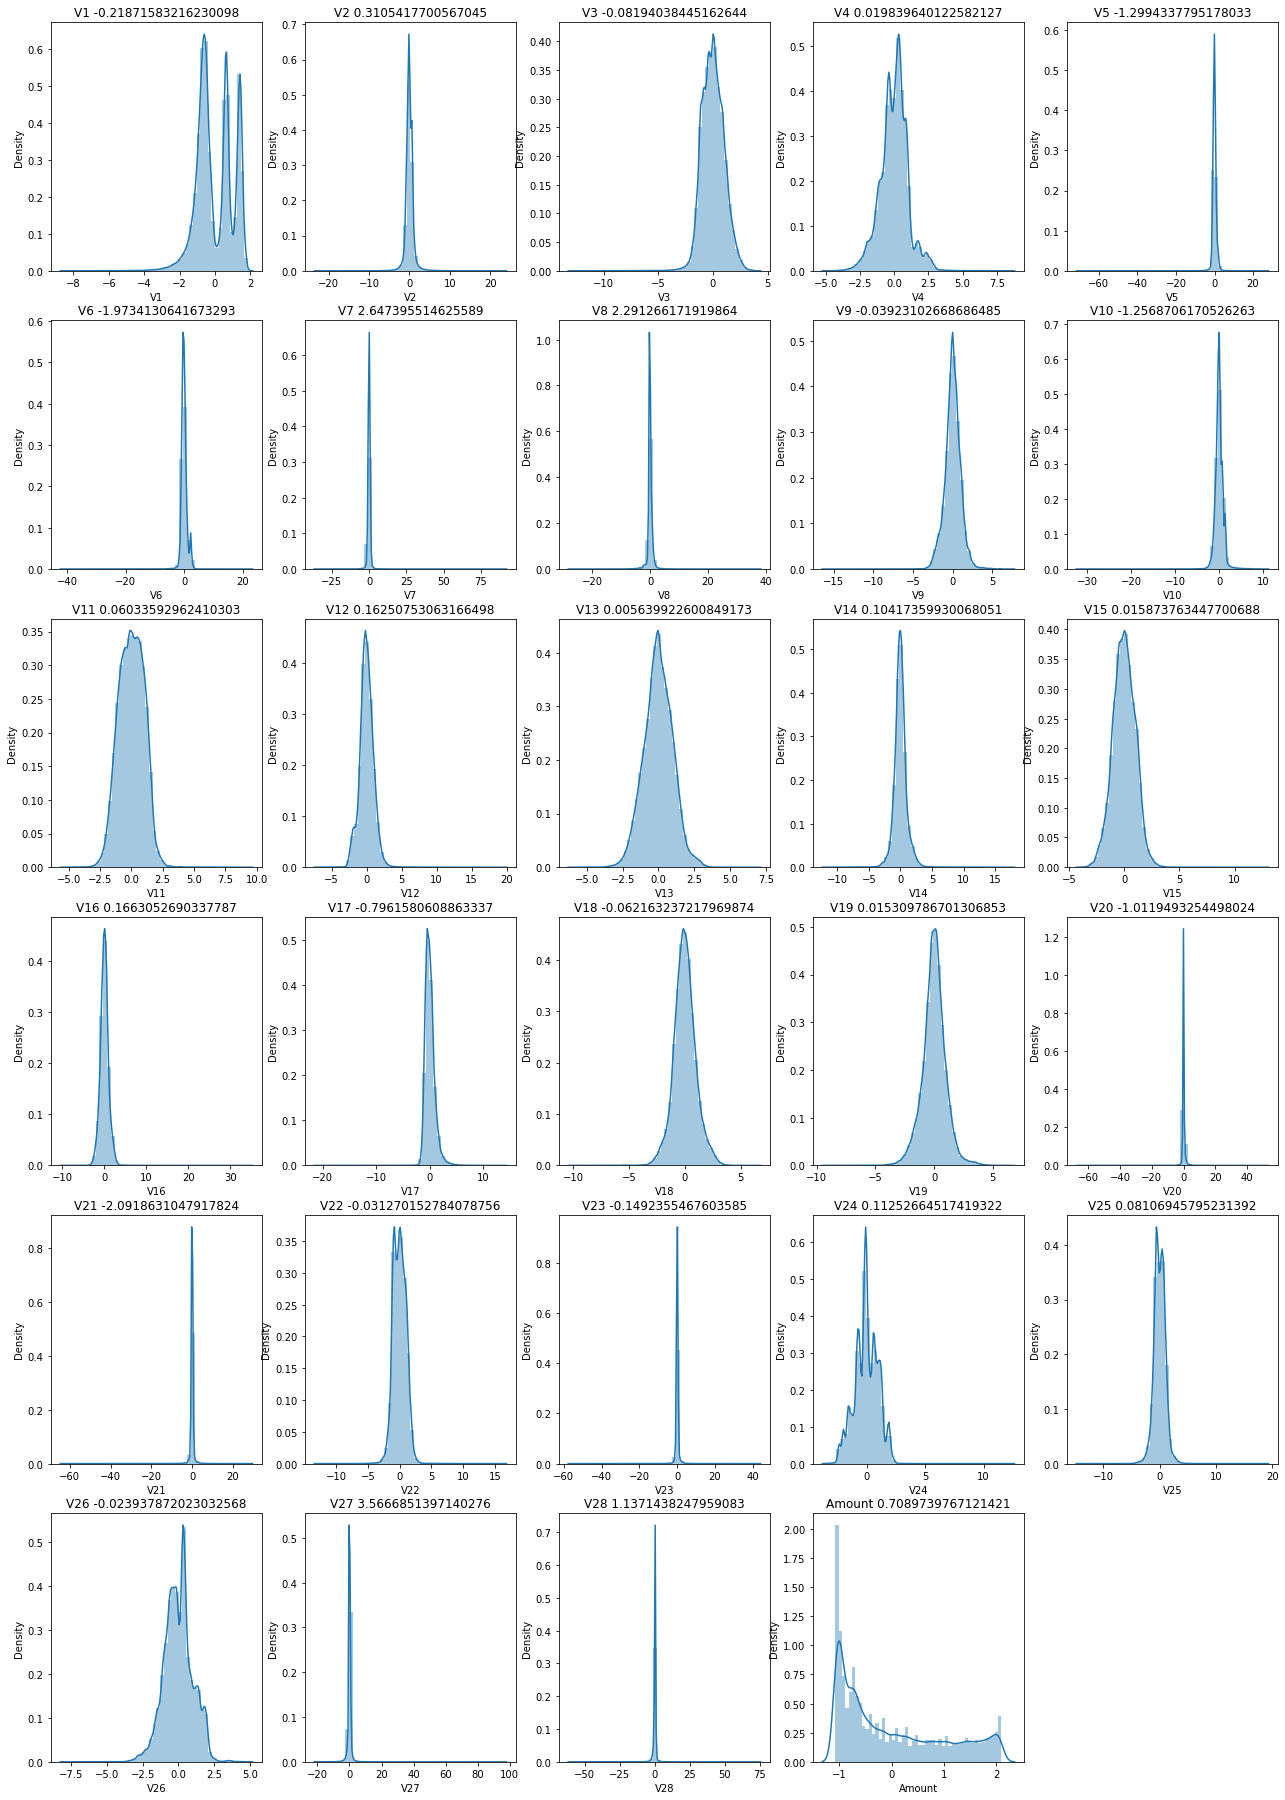

In [35]:
# plot the histogram of a variable from the dataset again to see the result 
plot_dist()

After the Power transformation the variables are more gaussian .
Changes in V1, V12, V26 and Amount coulmn are quite evident. Skewness has been removed by some extent.

## Model Building
- Build different models on the imbalanced dataset and see the result

We will use ROC curve and find AUC Score as the performance matrix for the models.

ROC curve meausres the performance of the model at different thresholds which will help us find the optimum threshold for the model.

In [36]:
def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


def clf_score_train(clf):
    prob = clf.predict_proba(X_train)
    prob = prob[:, 1]
    auc = roc_auc_score(y_train, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_train,prob)
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_train)
    report = classification_report(y_train, predicted)
    print(report)
    return auc

def clf_score_test(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc   


For cross validation, GridsearchCV has been used.

### Logistic Regression

In [37]:
# Logistic Regression
from sklearn import linear_model #import the package

#perform cross validation
num_C = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values

k_folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
lsr = LogisticRegression()
model_cv = GridSearchCV(estimator = lsr,
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = k_folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [38]:
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

print(' Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Tuned hpyerparameters : Best hyperparameters: ', model_cv.best_params_)

 Best ROC AUC score:  0.9798275665037472
Tuned hpyerparameters : Best hyperparameters:  {'C': 0.01}


In our case the best value of C=0.01

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.281048,0.058693,0.019956,0.006996,0.001,{'C': 0.001},0.967523,0.985138,0.985353,0.967048,...,0.976679,0.008076,7,0.981089,0.978032,0.977490,0.983125,0.975391,0.979025,0.002743
1,0.399453,0.057084,0.016049,0.001568,0.01,{'C': 0.01},0.966167,0.989007,0.991357,0.970828,...,0.979828,0.009886,1,0.986599,0.981099,0.980073,0.986226,0.980539,0.982907,0.002883
2,0.504178,0.074117,0.021346,0.009533,0.1,{'C': 0.1},0.968405,0.985414,0.989258,0.968293,...,0.978565,0.008699,2,0.984972,0.979649,0.979029,0.985601,0.980301,0.981910,0.002793
3,0.496138,0.033880,0.014740,0.000794,1,{'C': 1},0.969239,0.984410,0.988167,0.967079,...,0.977939,0.008346,3,0.984123,0.978959,0.978529,0.985220,0.979944,0.981355,0.002768
4,0.506835,0.019793,0.017781,0.001174,10,{'C': 10},0.969337,0.984301,0.988029,0.966932,...,0.977858,0.008306,4,0.984012,0.978873,0.978468,0.985171,0.979897,0.981284,0.002765
5,0.496511,0.089910,0.020209,0.008749,100,{'C': 100},0.969351,0.984290,0.988014,0.966918,...,0.977851,0.008301,5,0.984000,0.978864,0.978462,0.985165,0.979891,0.981277,0.002764
6,0.513361,0.070543,0.015860,0.001518,1000,{'C': 1000},0.969352,0.984289,0.988013,0.966915,...,0.977851,0.008301,6,0.983999,0.978863,0.978462,0.985165,0.979891,0.981276,0.002764


In [40]:
def plot_c_train_validation(cv_result):
  # plot of C versus train and validation scores
  plt.figure(figsize=(8, 6))
  plt.plot(cv_result['param_C'], cv_result['mean_test_score'])
  plt.plot(cv_result['param_C'], cv_result['mean_train_score'])
  plt.xlabel('C')
  plt.ylabel('sensitivity')
  plt.legend(['test result', 'train result'], loc='upper left')
  plt.xscale('log')

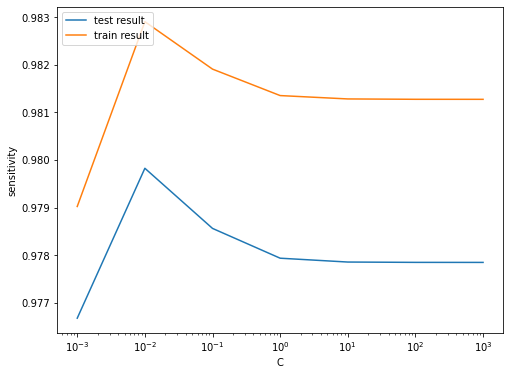

In [41]:
plot_c_train_validation(cv_results)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

AUC: 0.98


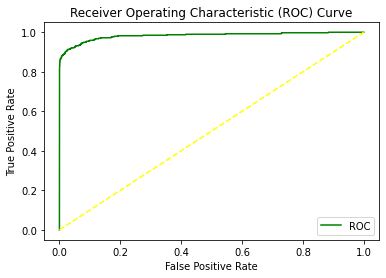

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.61      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



0.9827629522123658

In [42]:
lsr_best = LogisticRegression(C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score_train(lsr_clf)

#### Evaluate model on Test Data:


AUC: 0.98


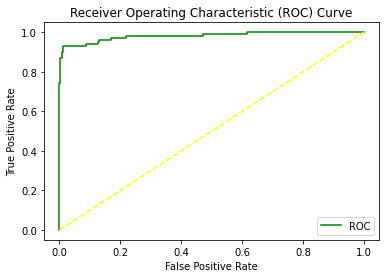

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



0.9806561376660963

In [43]:
clf_score_test(lsr_clf)

The AUC score is 0.98 but the data is clearly overfitting due to the imbalanced data.

### Decision Tree


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [50]:
print("Best roc_auc:-", grid_search.best_score_)
print("Best estimator:-",grid_search.best_estimator_)

Best roc_auc:- 0.9338362614319525
Best estimator:- DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


The score for depth=5,min_samples_leaf=100, min_samples_split=50 are the highest. We will use this in our model.

In [51]:
dt_best = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_clf = dt_best.fit(X_train, y_train)

AUC: 0.95


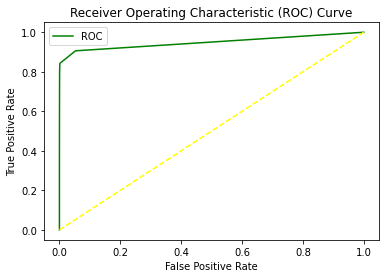

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



0.9486790003545584

In [52]:
clf_score_train(dt_clf)

The AUC score for decision tree is only 0.95 which is not satisfactory then Logistic model. 

#### Evaluate model on Test Data:

AUC: 0.96


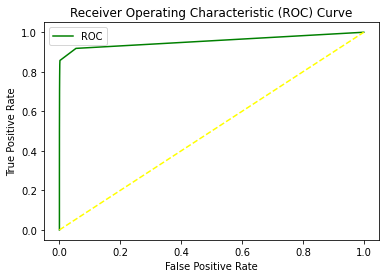

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9550532491415248

In [53]:
clf_score_test(dt_clf)

The AUC score for decision tree is only 0.95 . 

### Random forest:

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
param_grid = {
    'max_depth': [2, 3, 4, 7, 9],
    'n_estimators': [10, 20, 30, 40, 50], 
    'max_features': [10, 20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 5,
                           scoring='roc_auc', n_jobs=-1)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 7, 9], 'max_features': [10, 20],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [56]:
print("Best roc_auc:-", grid_search.best_score_)
print("Best estimator:-",grid_search.best_estimator_)

Best roc_auc:- 0.9748099537010123
Best estimator:- RandomForestClassifier(max_depth=9, max_features=20, n_estimators=50)


We will use these parameters for Random forest {'max_depth': 9, 'n_estimators': 50}. The Accuracy is 0.97 which is very good.

In [57]:
rfc_best = RandomForestClassifier(max_depth=9, n_estimators=50,max_features=20)

In [58]:
rfc_clf = rfc_best.fit(X_train, y_train)

AUC: 0.99


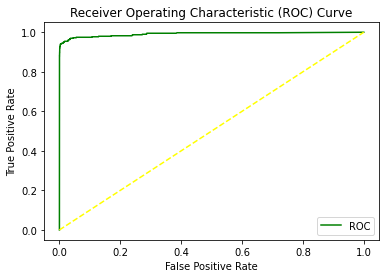

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.82      0.90       394

    accuracy                           1.00    227845
   macro avg       1.00      0.91      0.95    227845
weighted avg       1.00      1.00      1.00    227845



0.9914974881520194

In [59]:
clf_score_train(rfc_clf)

#### Evaluate model on Test Data:

AUC: 0.97


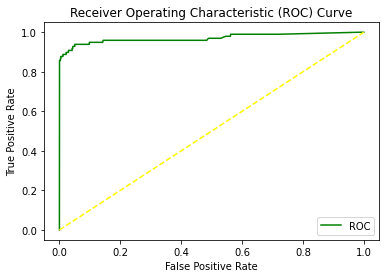

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.970581078520322

In [60]:
clf_score_test(rfc_clf)

We are getting very good precision(0.97) for Faudulent class which is very good along with the AUC of 0.97

### XGBoost

In [61]:
from xgboost import XGBClassifier

In [63]:
xgbst = XGBClassifier()
param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)



[04:04:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [64]:
print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 130}
accuracy : 0.983294106647275


We got the best parameters for XGboost as following.
tuned hpyerparameters : {'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 130} Accuracy : 0.98

[04:05:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 1.00


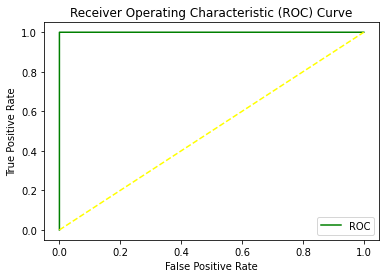

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



1.0

In [65]:
xgbest = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=2)

xgb_clf = xgbest.fit(X_train,y_train)

#Plotting ROC
clf_score_train(xgb_clf)

#### Evaluate model on Test Data:

AUC: 0.98


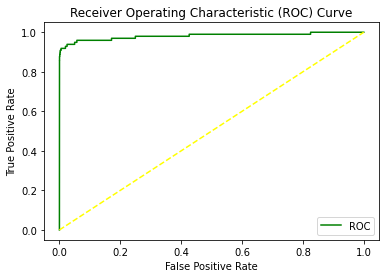

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9812492104326255

In [66]:
clf_score_test(xgb_clf)

We are getting AUC of 0.98 with f1-score of 0.87 which is good.
Recall is 0.80 which is better than our other models.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

#####  Out of the 4 models XGBoost performed the best with AUC of 0.98 and Recall of 0.80.

We are getting AUC of 0.98 with f1-score of 0.87 which is good.
Recall is 0.80 which is better than our other models.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


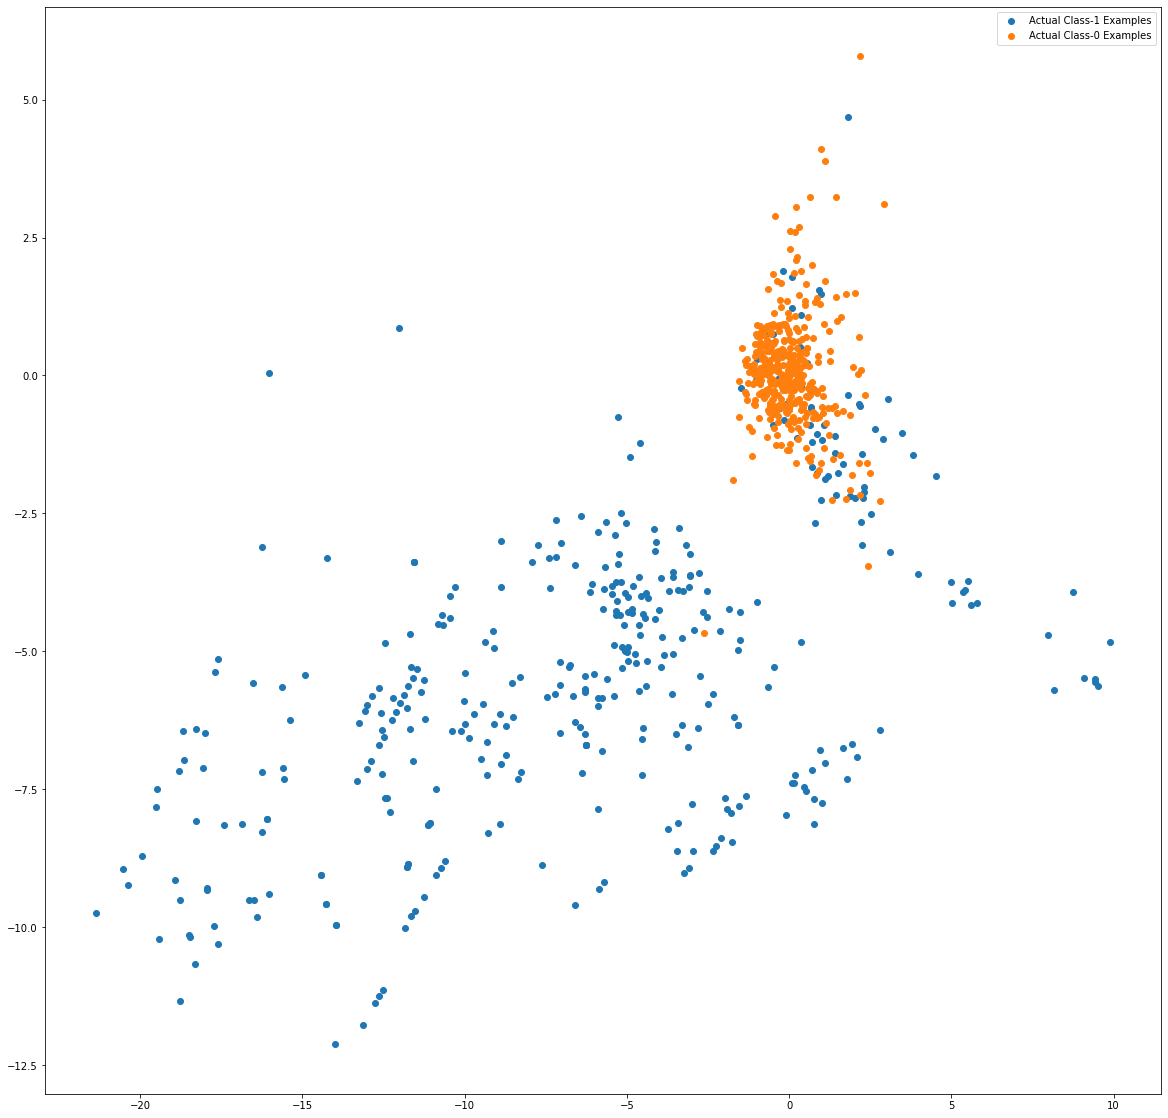

In [68]:
var_imp = []
for i in xgbest.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbest.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbest.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbest.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgbest.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbest.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [69]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgbest.predict_proba(X_train)[:,1]
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.7151603


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

We will use two balancing techniques Random Oversampling,  SMOTE & ADASYN.

<b>Random Oversampling:</b> This method uses synthetic data generation to increase the number of samples in the data set.


<b>SMOTE:</b> First it finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines.

<b>ADASYN (Adaptive Synthetic):</b> Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [71]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [72]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('Resampled dataset :-',Counter(y_train_over))
print(X_train_over.shape)
print(y_train_over.shape)

Before sampling class distribution:- Counter({0: 227451, 1: 394})
Resampled dataset :- Counter({0: 227451, 1: 227451})
(454902, 29)
(454902,)


As seen above the count of each class is same after Random Oversampling .

### Logistic Regression with Oversampling

In [74]:
#Logistic regression with SMOTE

AUC: 0.99


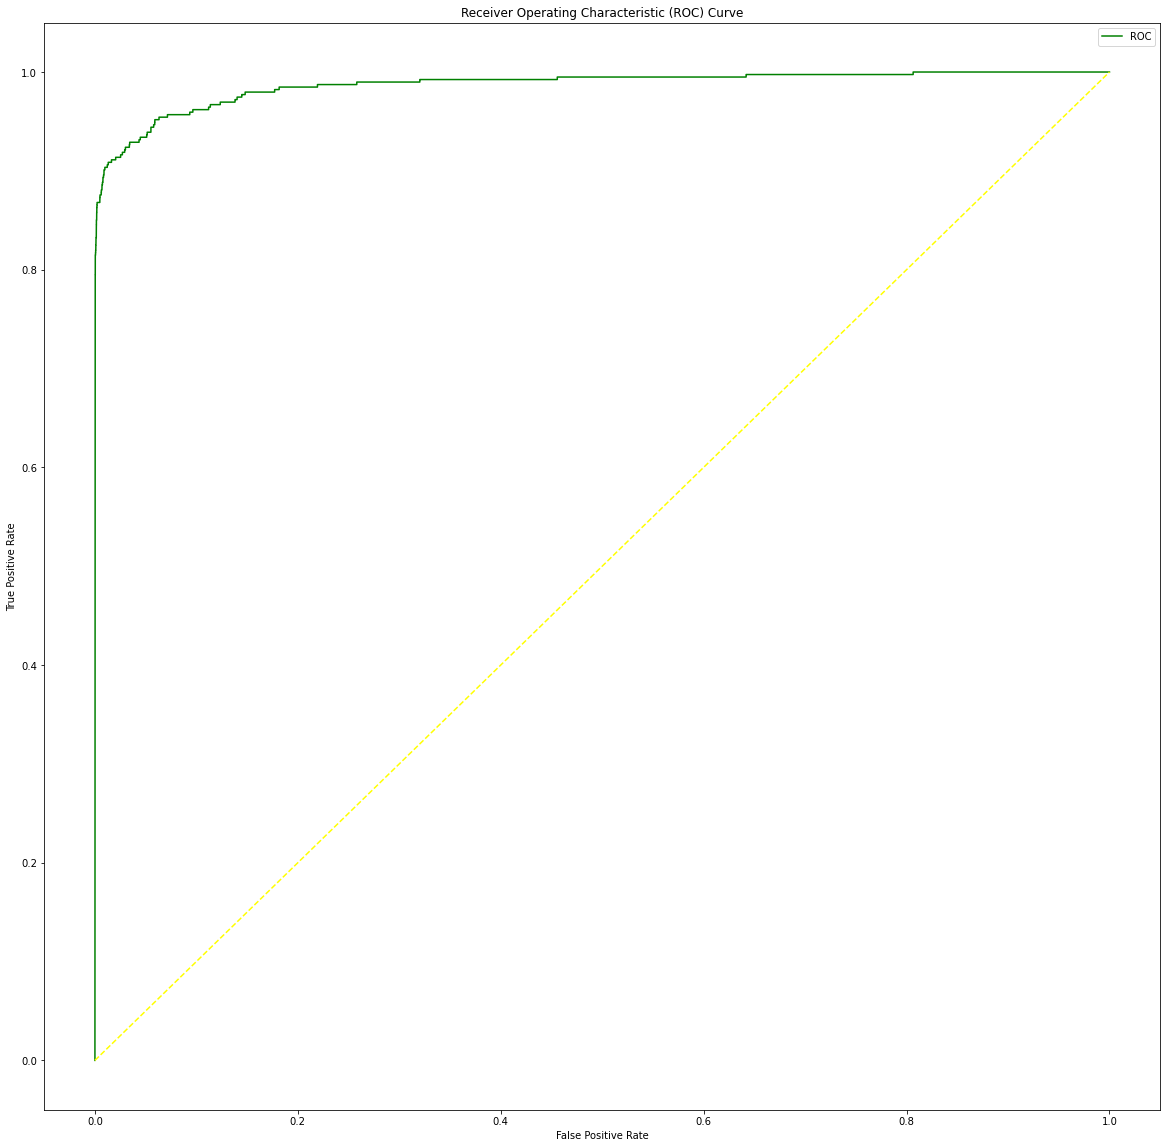

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.97      0.99    227845



0.9868337570426002

In [75]:
lsr_best = LogisticRegression(C=0.01,random_state = 0)
lsr_clf_over = lsr_best.fit(X_train_over,y_train_over)
clf_score_train(lsr_clf_over)

#### Evaluate model on Test Data:

AUC: 0.98


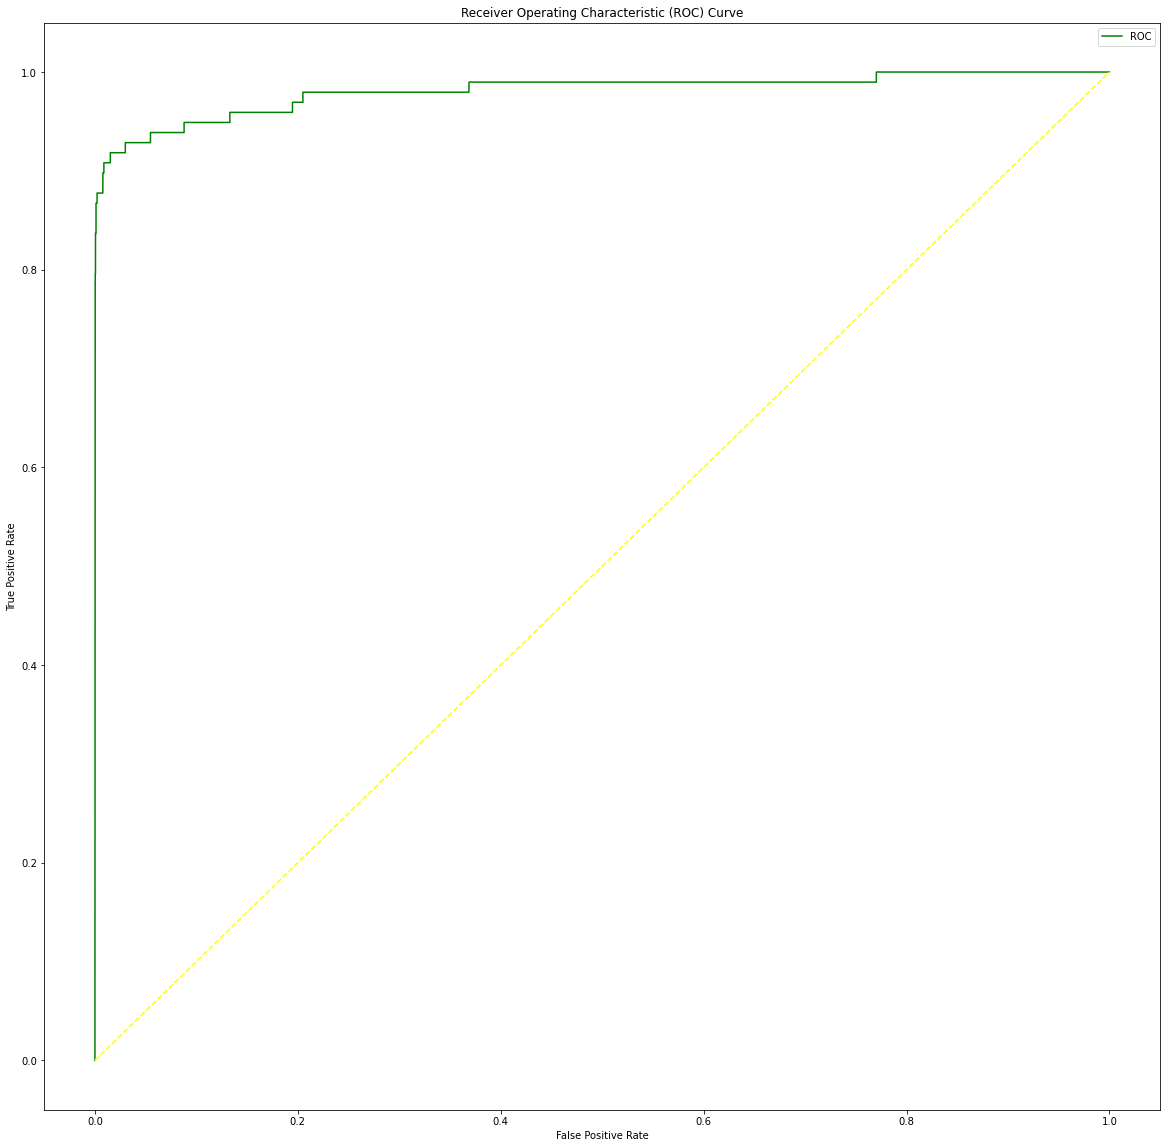

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



0.9806093916885832

In [76]:
clf_score_test(lsr_clf_over)

### Decision Tree with Oversampling

In [77]:
dt_best = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_clf_over = dt_best.fit(X_train_over, y_train_over)

AUC: 0.99


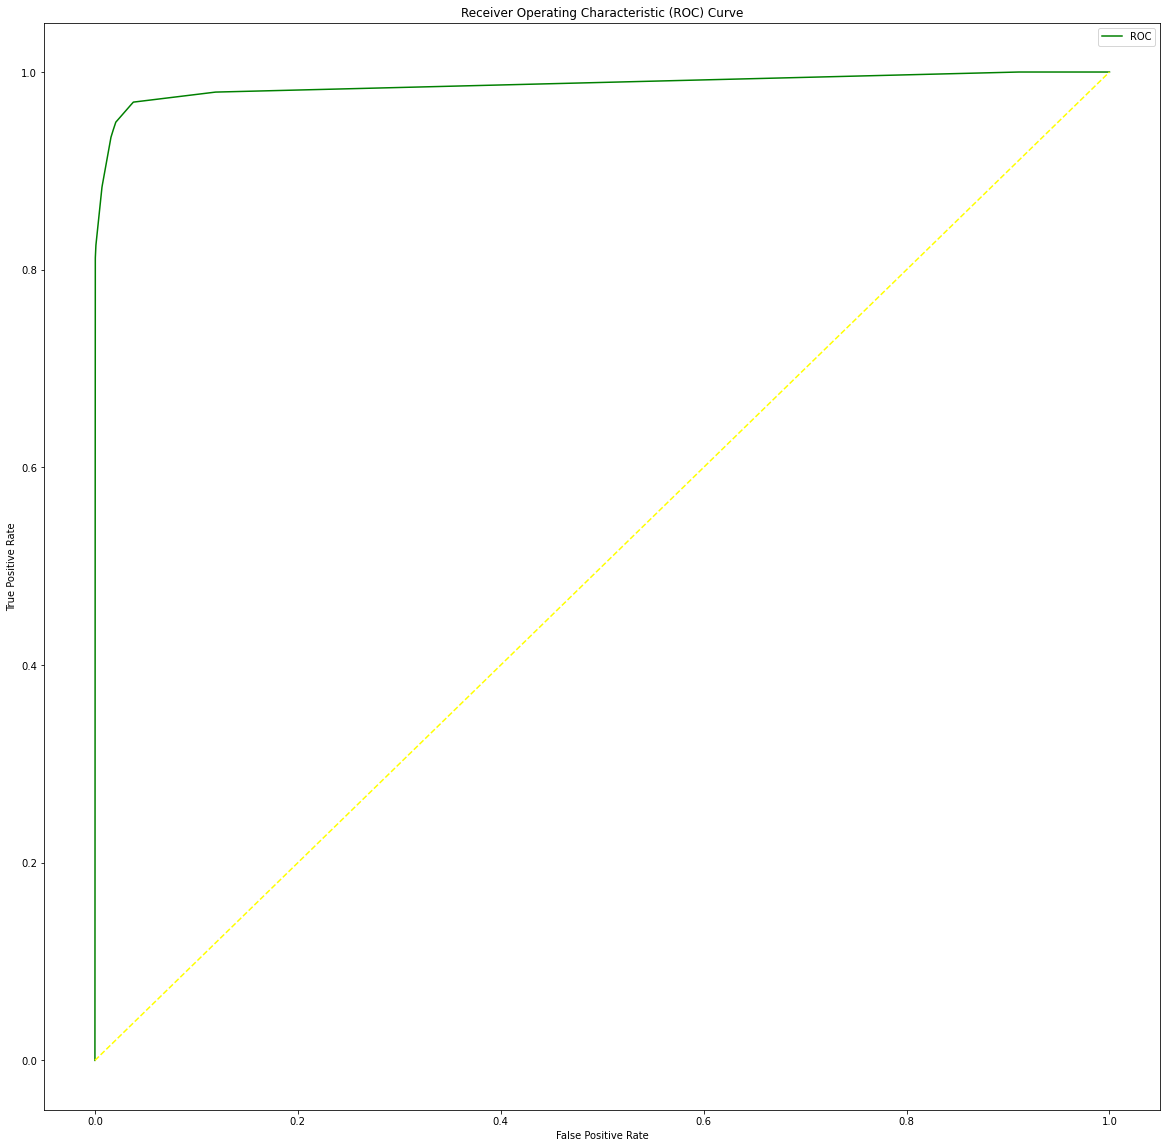

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.97      0.08       394

    accuracy                           0.96    227845
   macro avg       0.52      0.97      0.53    227845
weighted avg       1.00      0.96      0.98    227845



0.9869115112806023

In [78]:
clf_score_train(dt_clf_over)

#### Evaluate model on Test Data:

AUC: 0.90


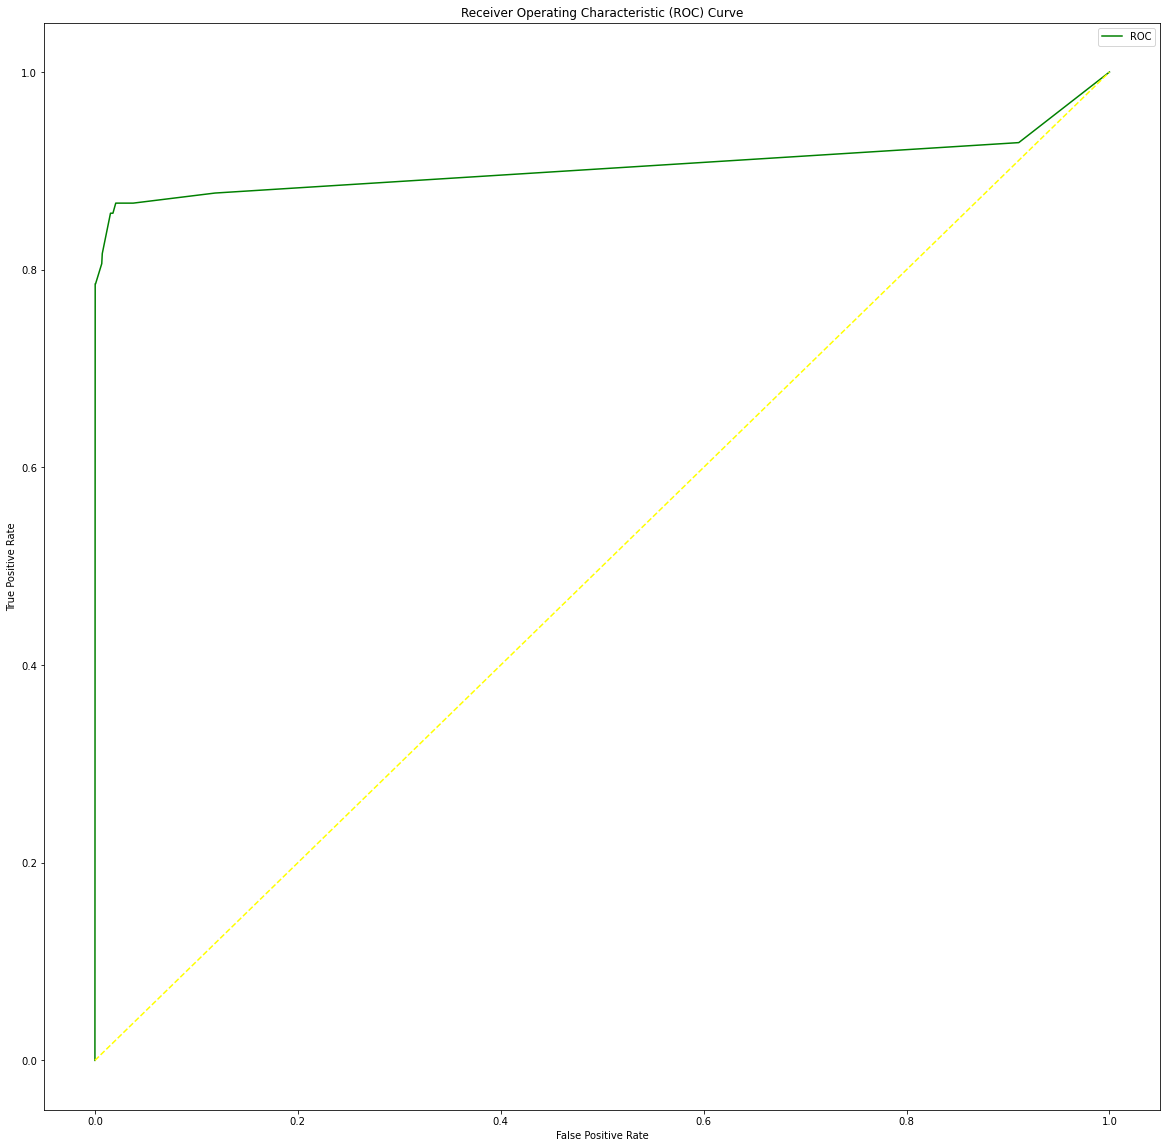

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.87      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.96      0.98     56962



0.9038146332674883

In [79]:
clf_score_test(dt_clf_over)

### Random Forest with Oversampling

In [80]:
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=9, n_estimators=50,max_features=20)

In [81]:
rfc_clf_over = rfc_best.fit(X_train_over, y_train_over)

AUC: 0.99


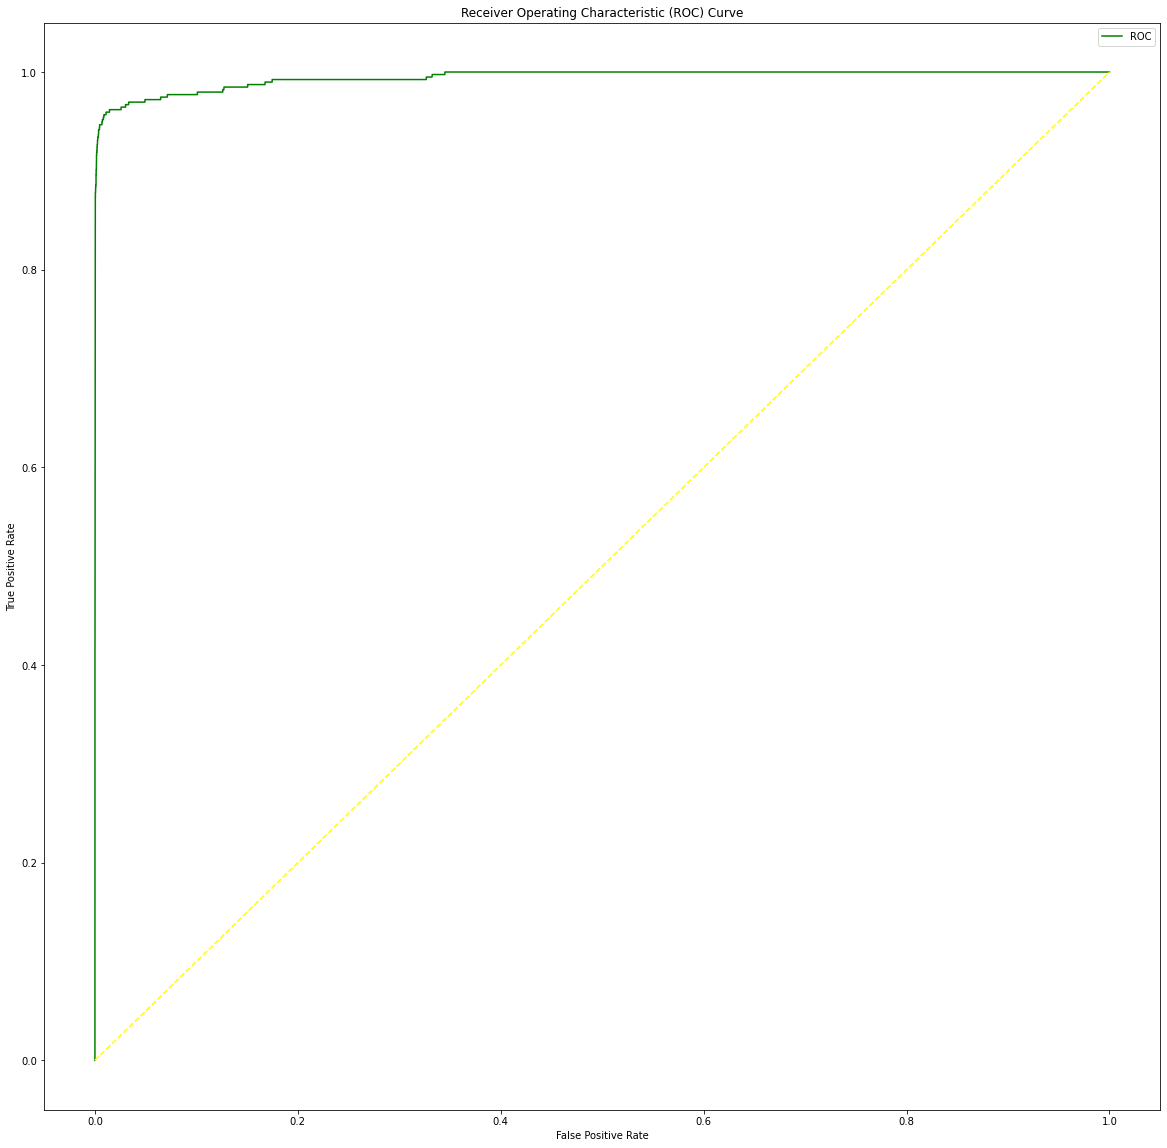

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.31      0.94      0.47       394

    accuracy                           1.00    227845
   macro avg       0.66      0.97      0.73    227845
weighted avg       1.00      1.00      1.00    227845



0.9942440383265905

In [82]:
clf_score_train(rfc_clf_over)

#### Evaluate model on Test Data:

AUC: 0.98


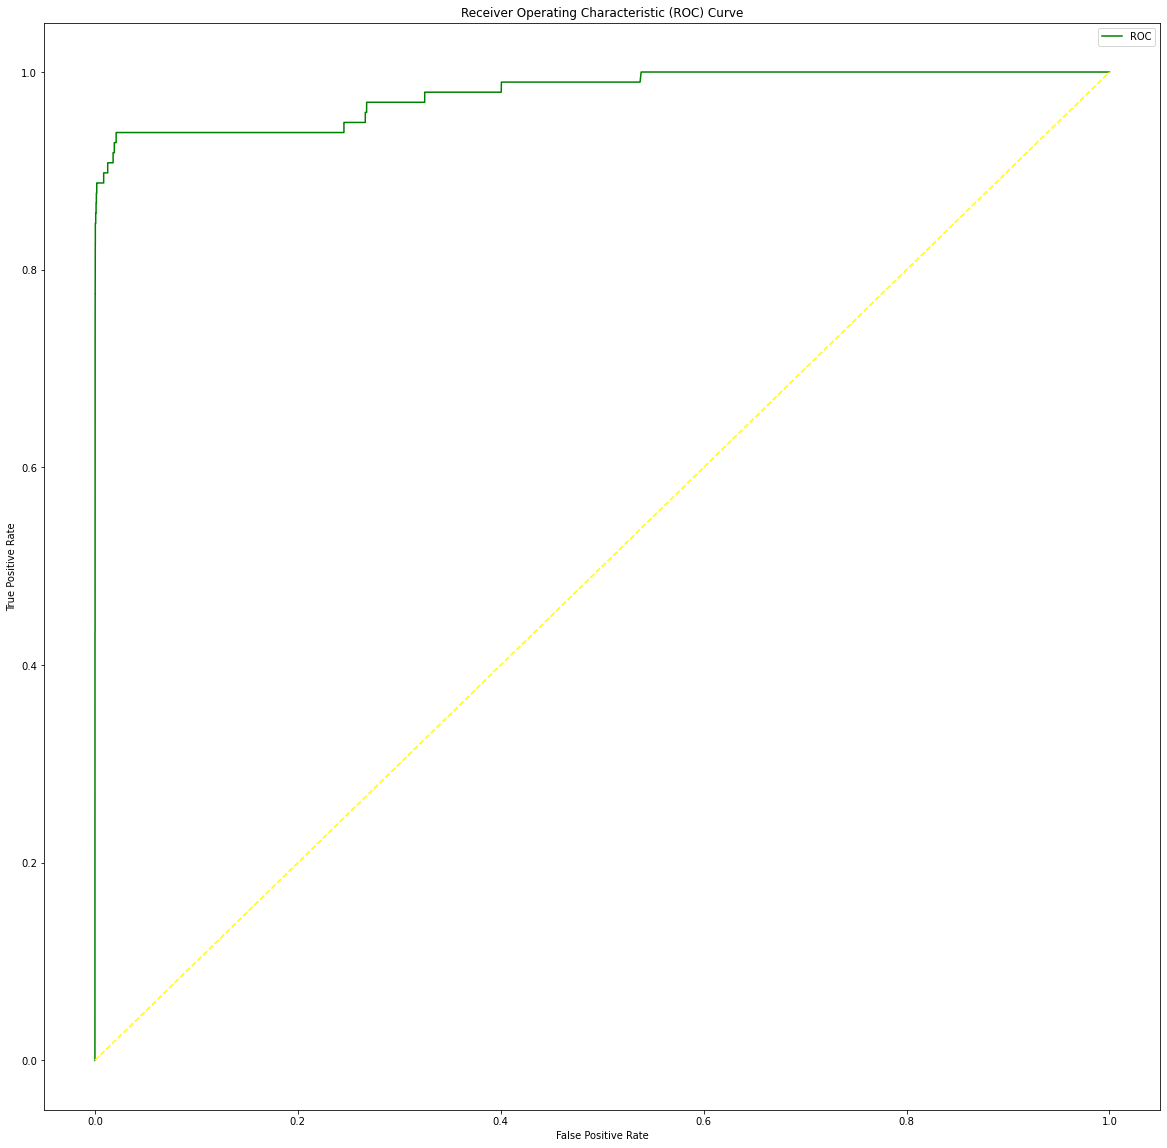

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.89      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.72     56962
weighted avg       1.00      1.00      1.00     56962



0.9781995064486121

In [83]:
clf_score_test(rfc_clf_over)

### XGBoost with Oversampling

[08:43:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 1.00


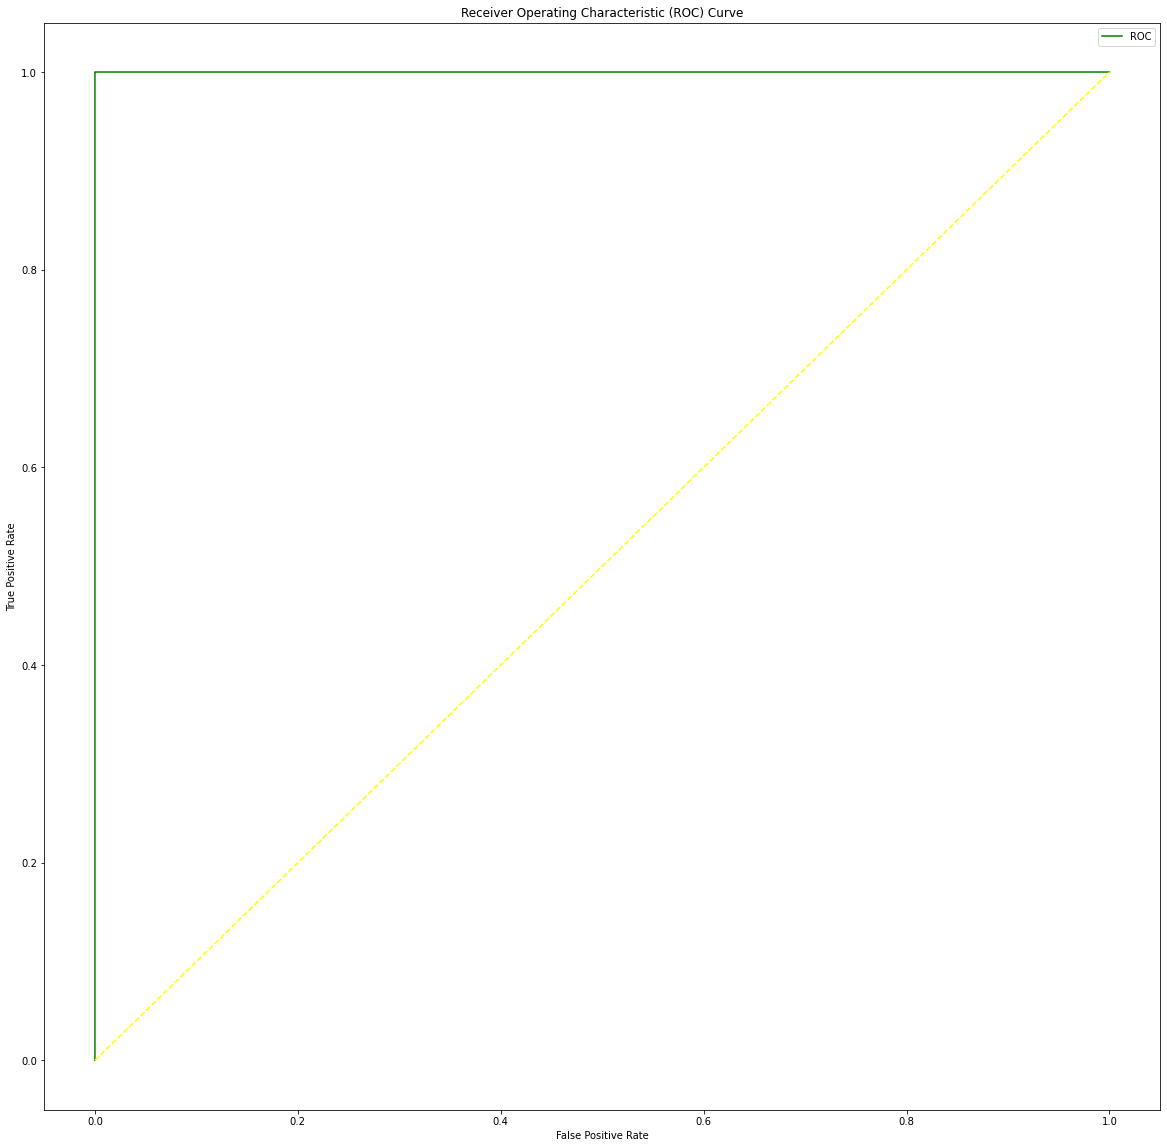

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



1.0

In [84]:
xgbest = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=2)

xgb_clf_over = xgbest.fit(X_train_over,y_train_over)

#Plotting ROC
clf_score_train(xgb_clf_over)

#### Evaluate model on Test Data:

AUC: 0.99


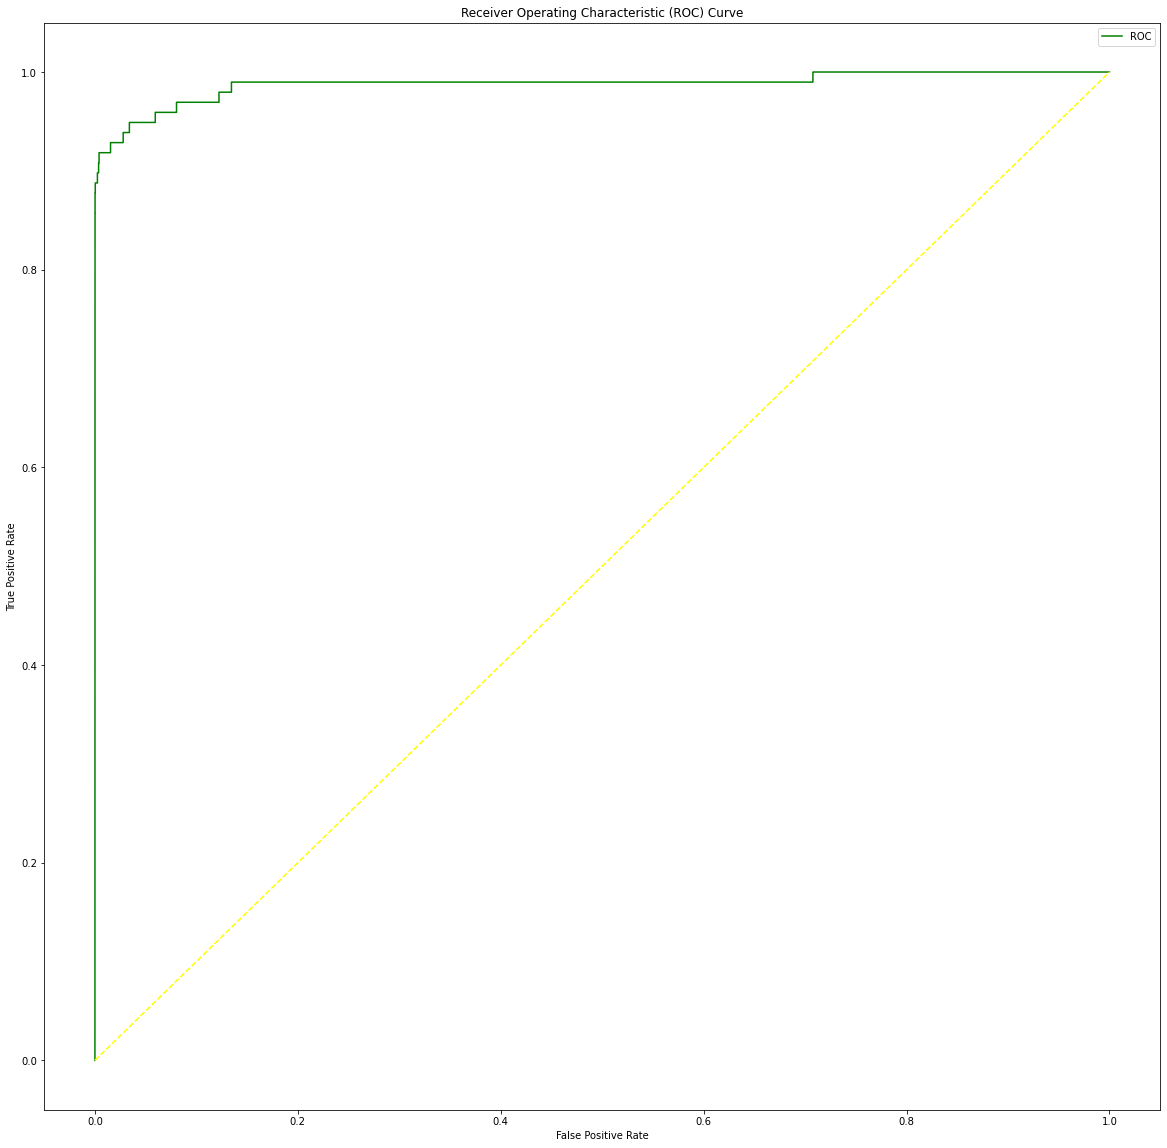

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9878293572634456

In [85]:
clf_score_test(xgb_clf_over)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

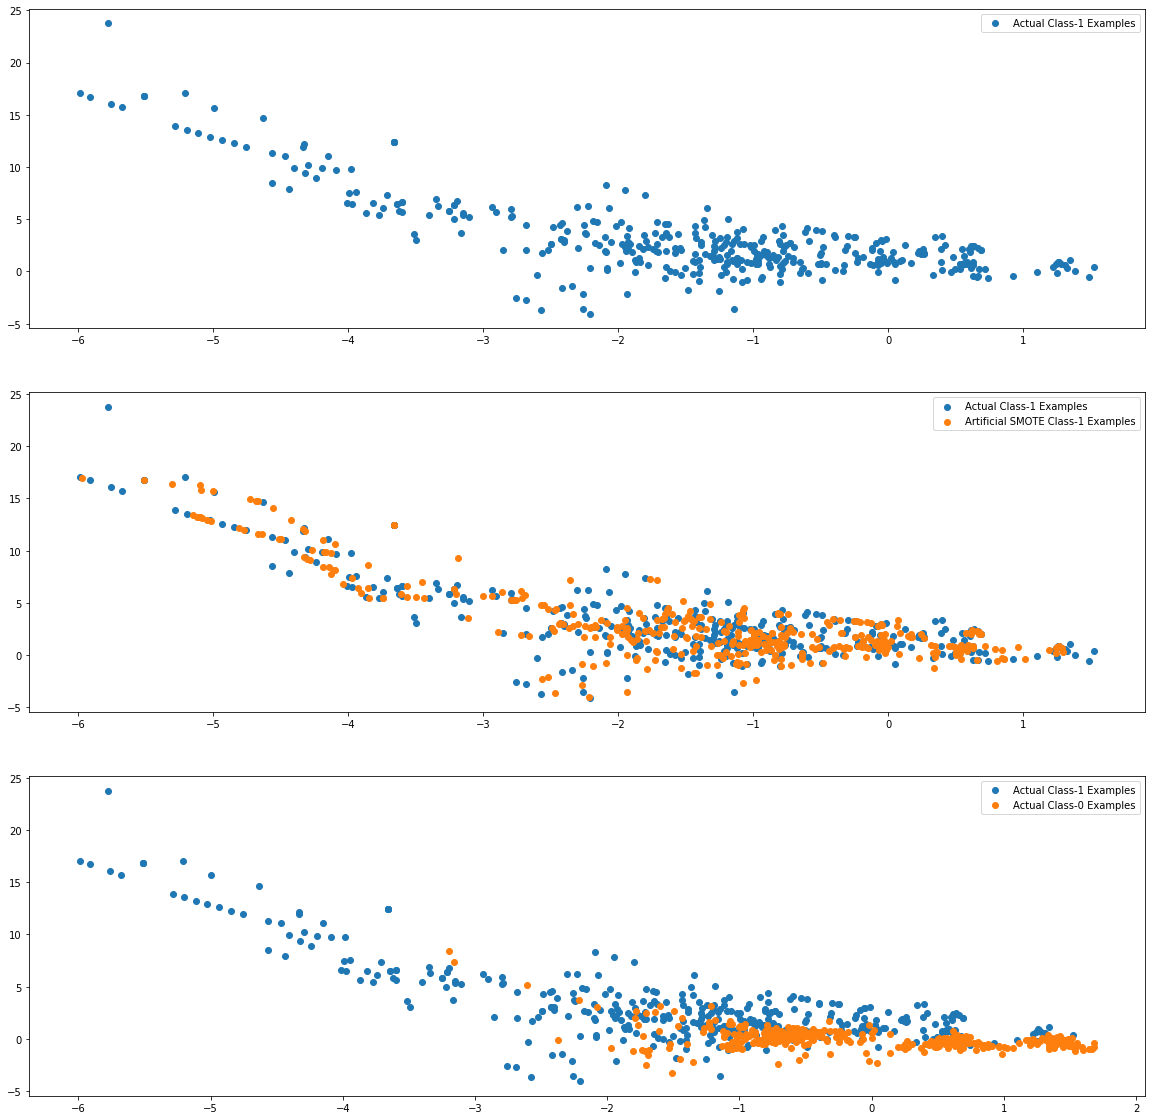

In [89]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [90]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('Resampled dataset :-',Counter(y_train_smote))
print(X_train_smote.shape)
print(y_train_smote.shape)

Before sampling class distribution:- Counter({0: 227451, 1: 394})
Resampled dataset :- Counter({0: 227451, 1: 227451})
(454902, 29)
(454902,)


As seen above the count of each class is same after SMOTE resampling.

We will use our tuned models which was built on imbalanced data, with both SMOTE and ADASYN technique and see which one gives the best result.

### Logistic Regression with SMOTE

In [92]:
#Logistic regression with SMOTE

AUC: 0.99


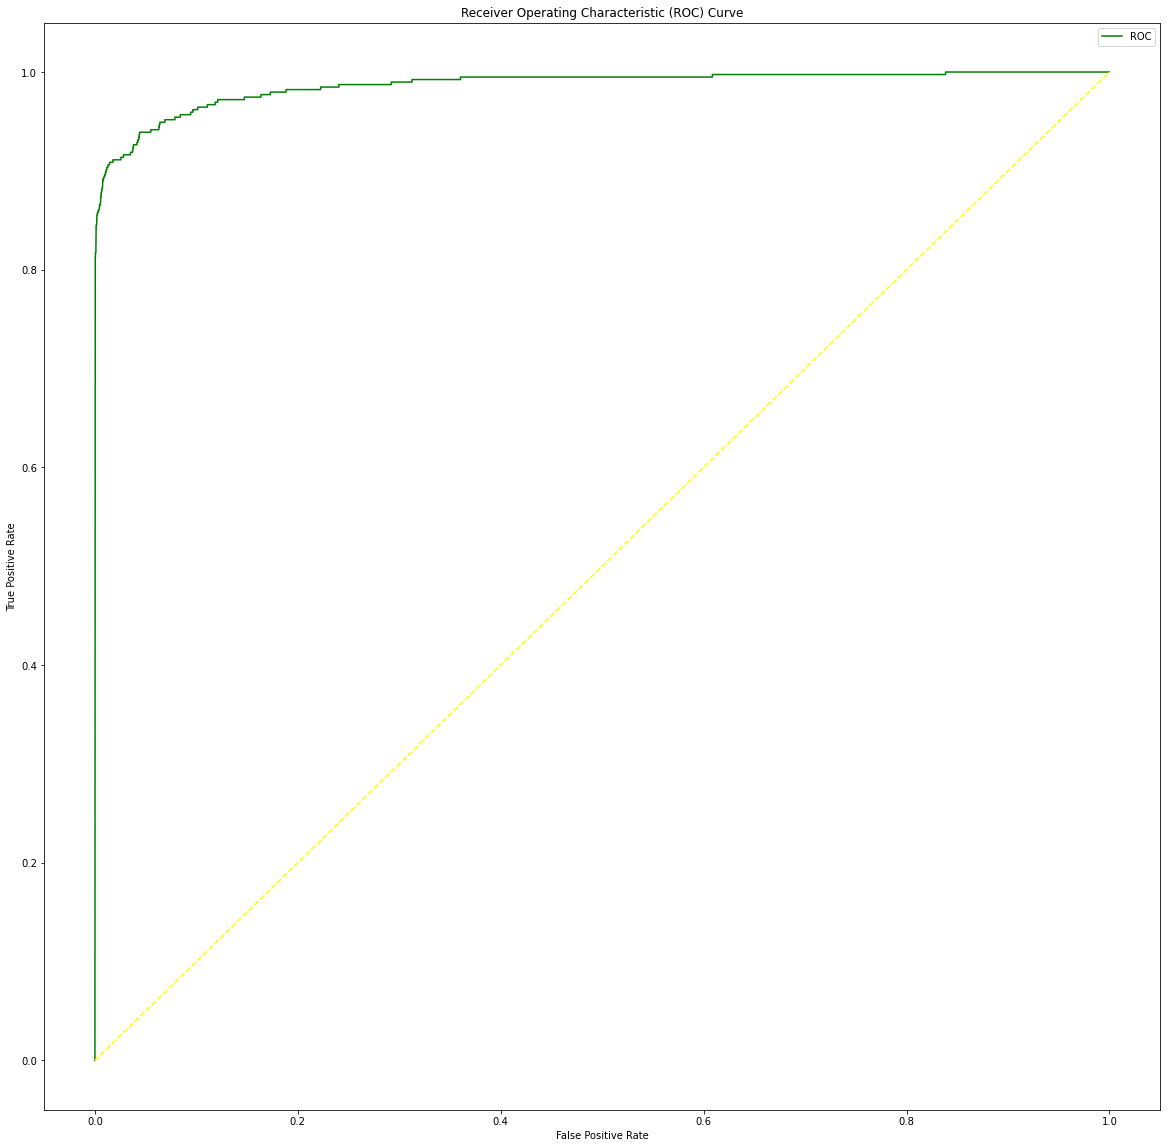

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.05      0.91      0.10       394

    accuracy                           0.97    227845
   macro avg       0.53      0.94      0.54    227845
weighted avg       1.00      0.97      0.98    227845



0.9865156263812453

In [93]:
lsr_best = LogisticRegression(C=0.01,random_state = 0)
lsr_clf_smote = lsr_best.fit(X_train_smote,y_train_smote)
clf_score_train(lsr_clf_smote)

#### Evaluate model on Test Data:

AUC: 0.98


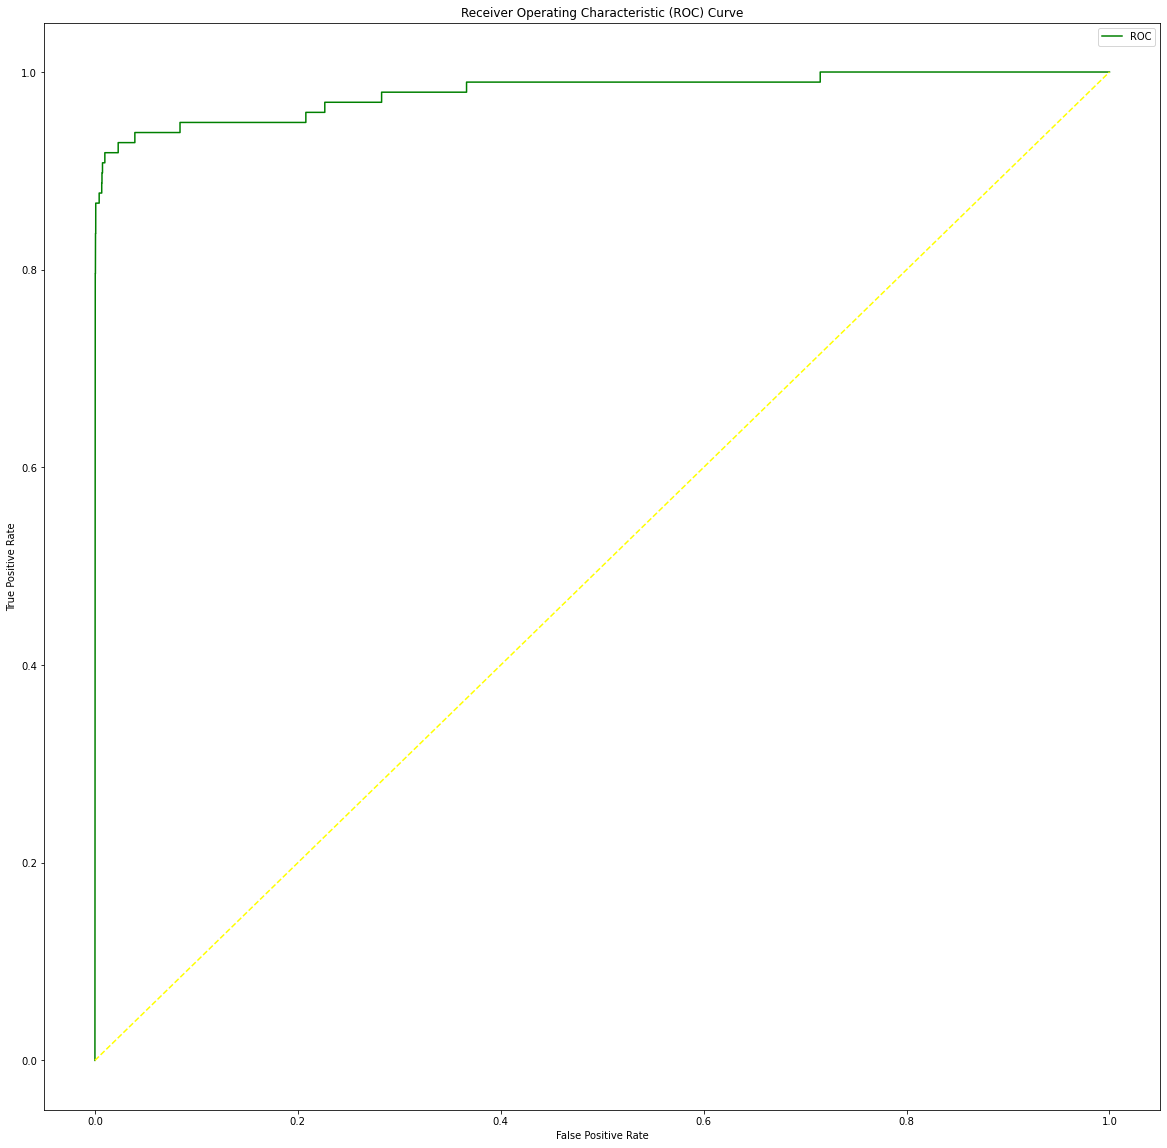

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



0.9796601163678753

In [94]:
clf_score_test(lsr_clf_smote)

AUC & Recall both are better on SMOTE.
But the f1-score is extremely low. Model is overfitting.


### Decision Tree with SMOTE

In [95]:
dt_best = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_clf_smote = dt_best.fit(X_train_smote, y_train_smote)

AUC: 0.98


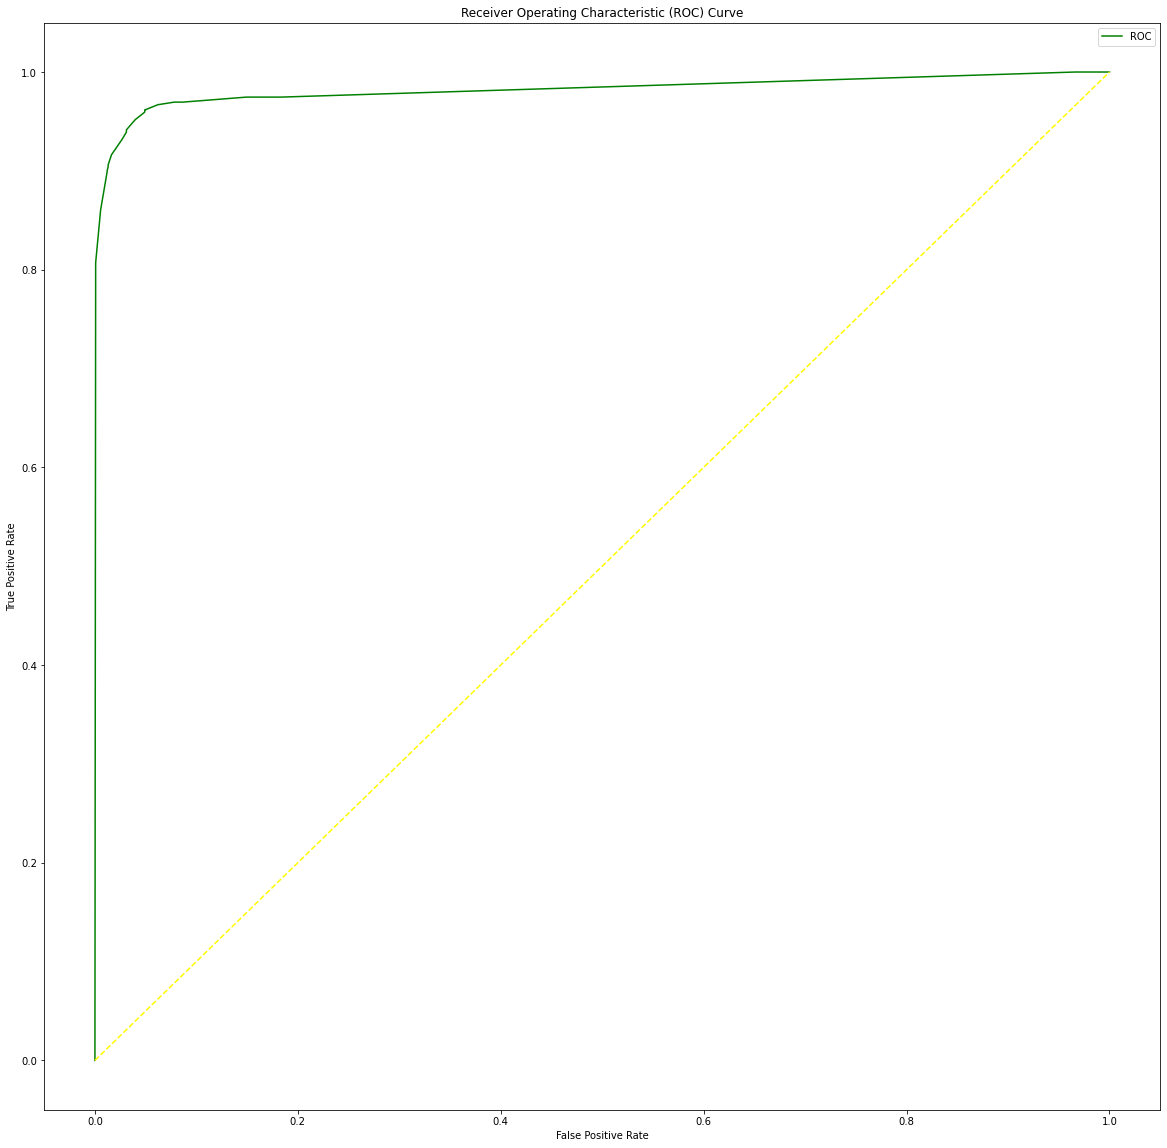

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    227451
           1       0.05      0.94      0.09       394

    accuracy                           0.97    227845
   macro avg       0.52      0.96      0.54    227845
weighted avg       1.00      0.97      0.98    227845



0.9818627527450717

In [96]:
clf_score_train(dt_clf_smote)

#### Evaluate model on Test Data:

AUC: 0.96


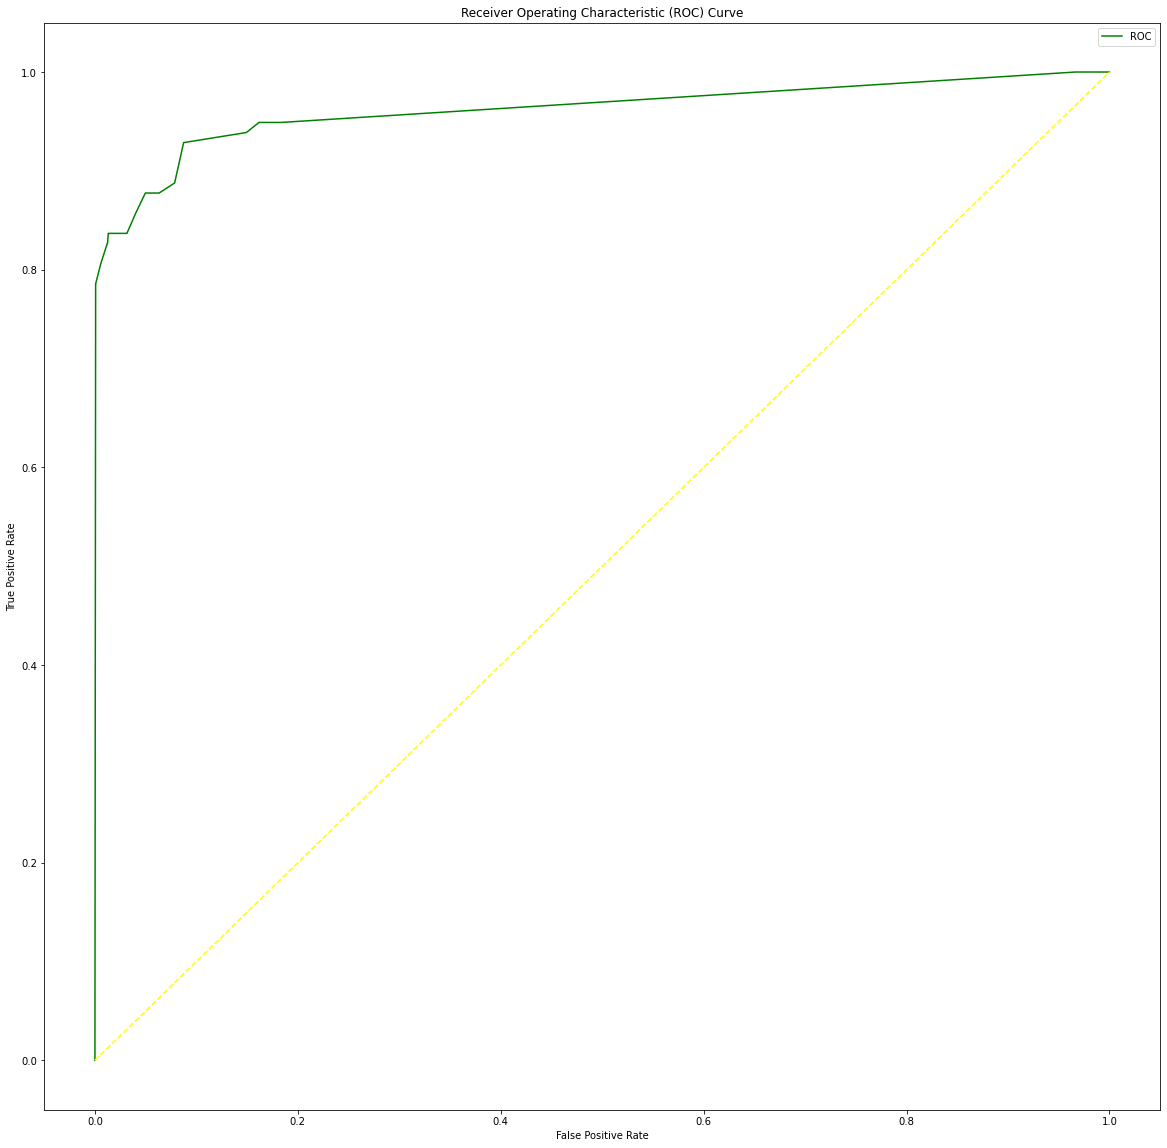

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.84      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



0.9614520646469054

In [97]:
clf_score_test(dt_clf_smote)

### Random Forest with SMOTE

In [98]:
###rfc_best = RandomForestClassifier(bootstrap=True,
                            max_depth=9, n_estimators=50,max_features=20)

In [99]:
rfc_clf_smote = rfc_best.fit(X_train_smote, y_train_smote)

AUC: 1.00


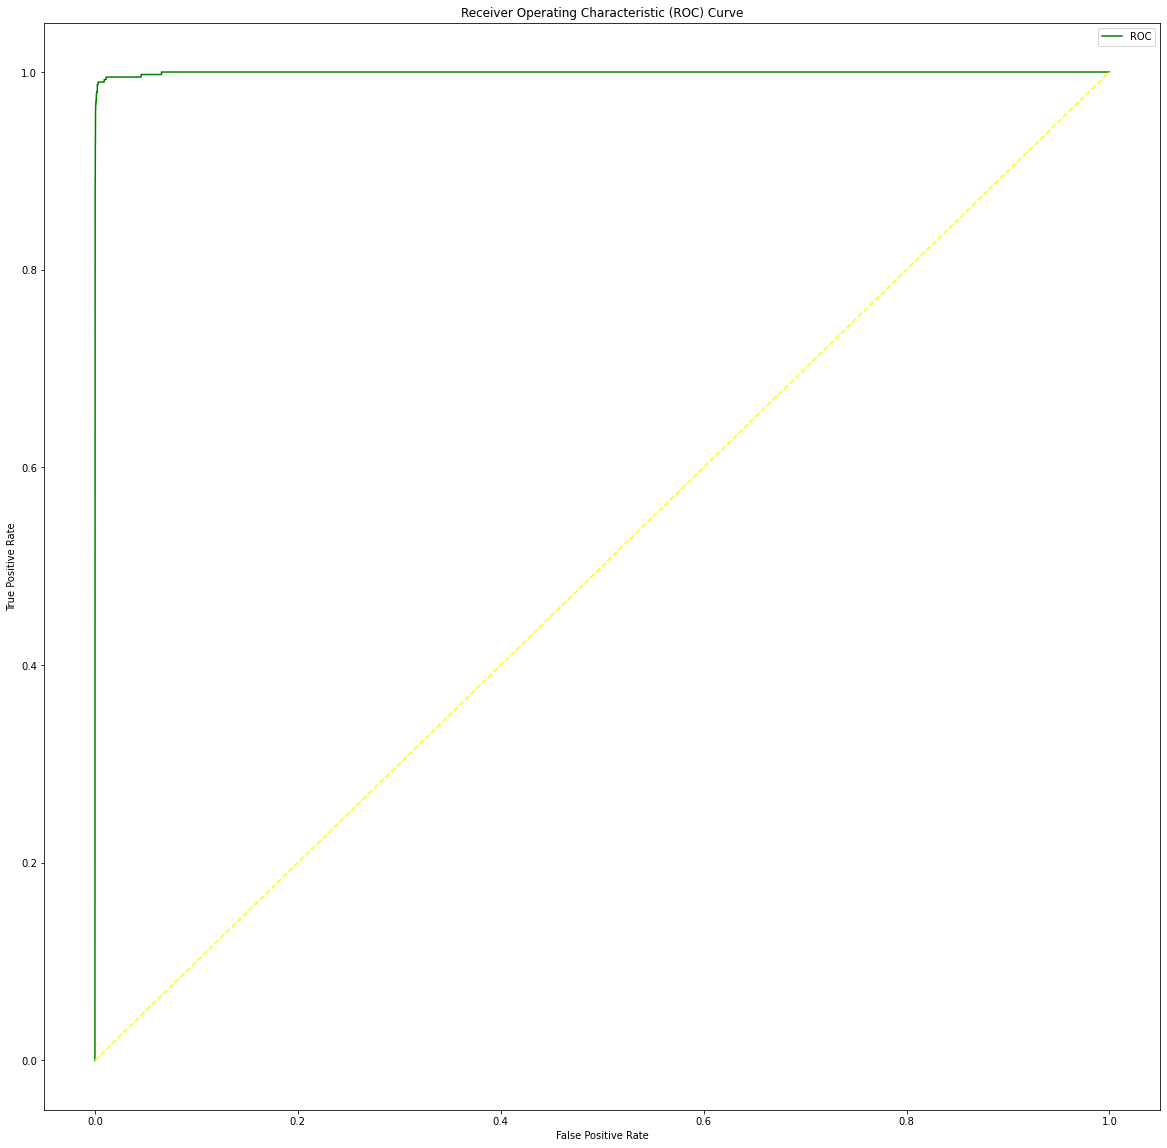

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.31      0.99      0.47       394

    accuracy                           1.00    227845
   macro avg       0.66      0.99      0.74    227845
weighted avg       1.00      1.00      1.00    227845



0.9995013206057413

In [100]:
clf_score_train(rfc_clf_smote)

#### Evaluate model on Test Data:

AUC: 0.99


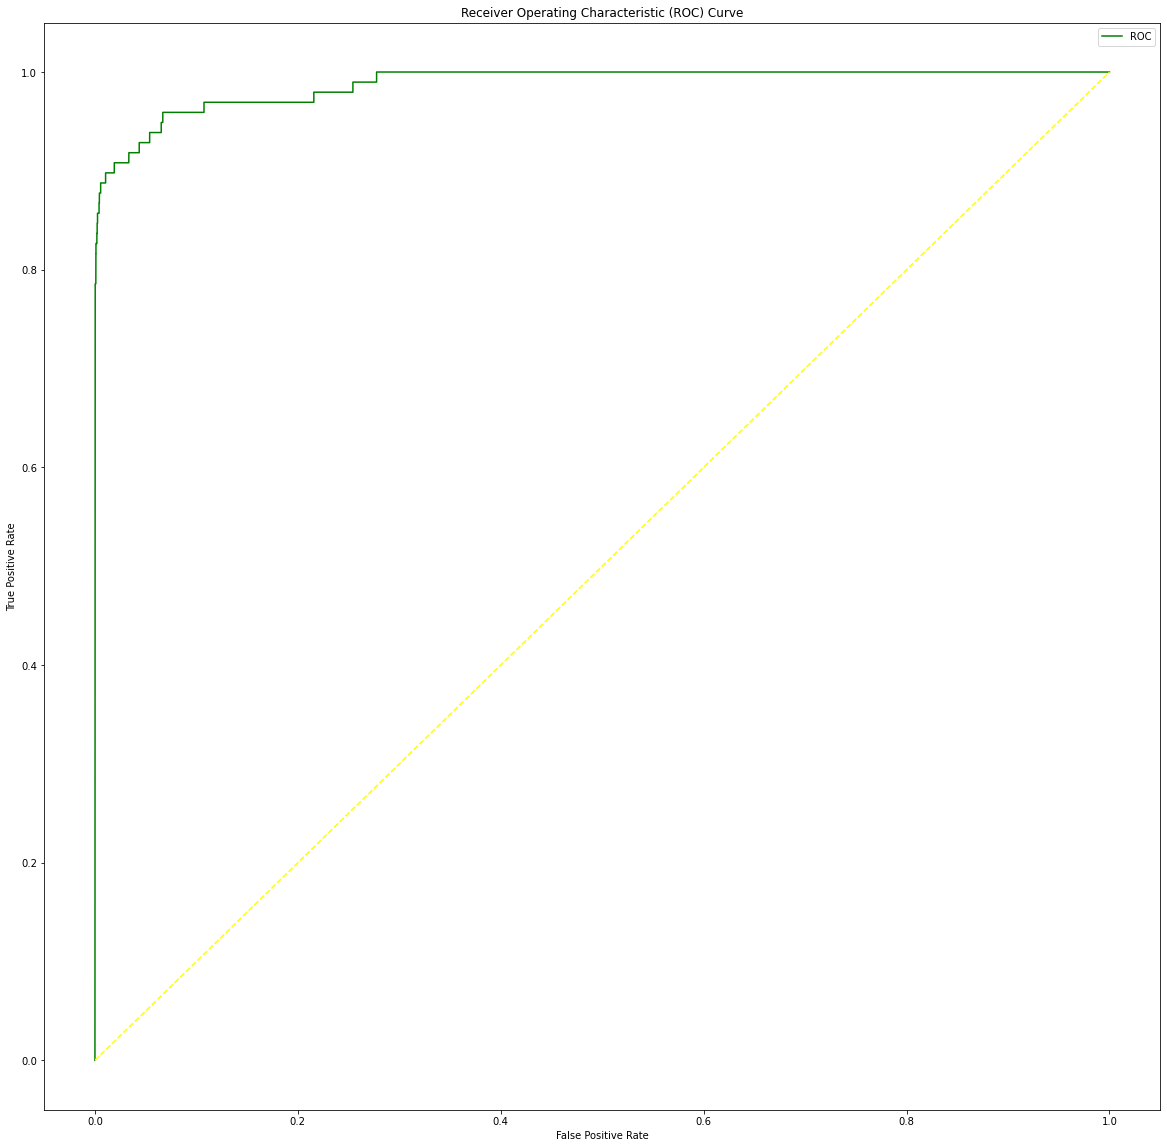

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.87      0.39        98

    accuracy                           1.00     56962
   macro avg       0.63      0.93      0.70     56962
weighted avg       1.00      1.00      1.00     56962



0.987954431913452

In [101]:
clf_score_test(rfc_clf_smote)

### XGBoost with SMOTE

[09:06:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 1.00


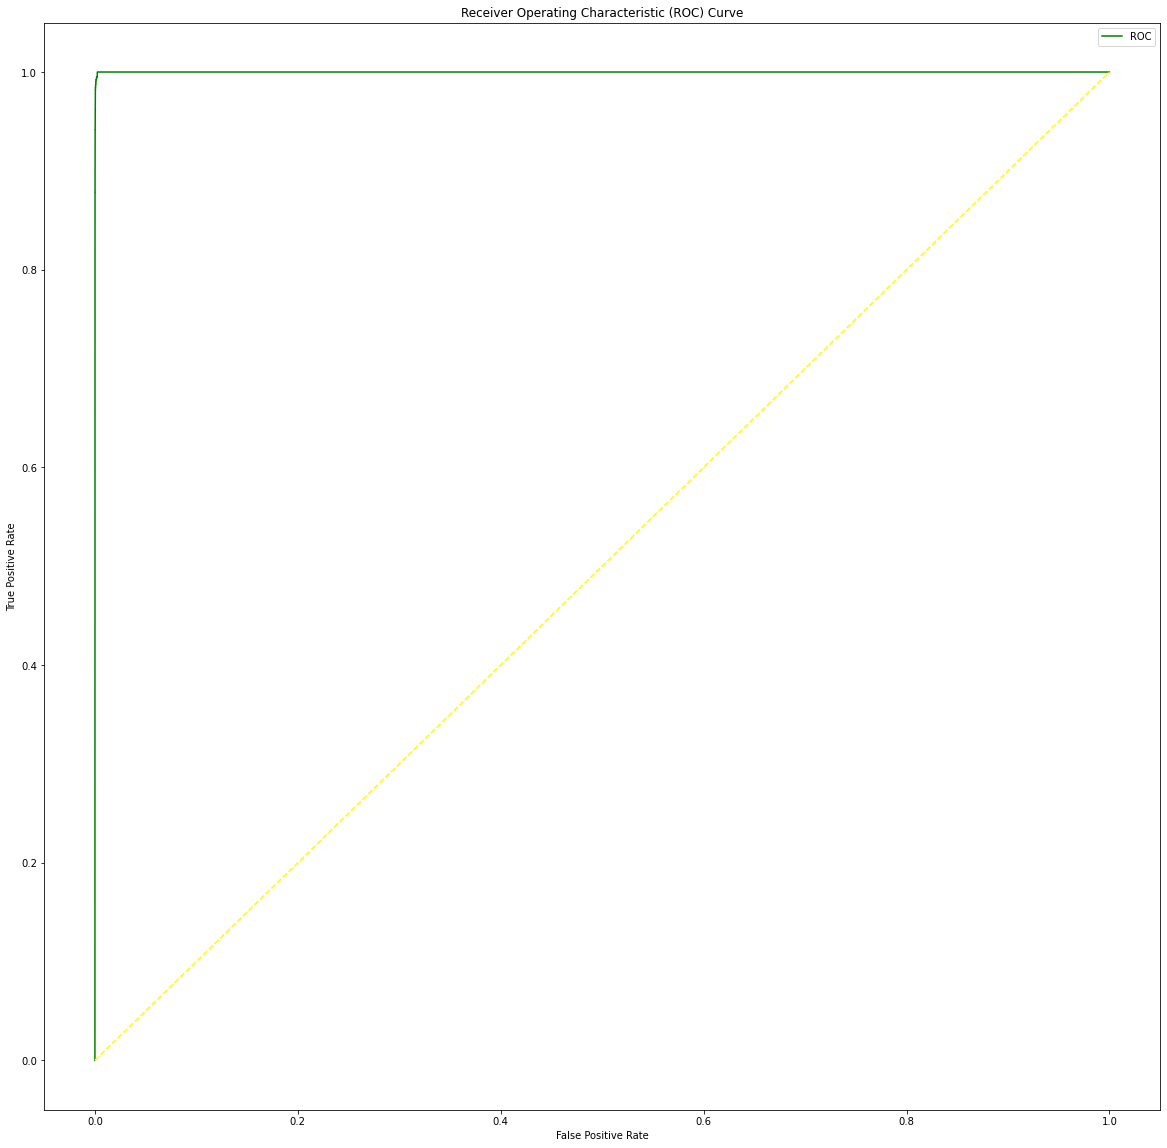

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.38      1.00      0.55       394

    accuracy                           1.00    227845
   macro avg       0.69      1.00      0.77    227845
weighted avg       1.00      1.00      1.00    227845



0.9999331478702826

In [102]:
xgbest = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=2)

xgb_clf_smote = xgbest.fit(X_train_smote,y_train_smote)

#Plotting ROC
clf_score_train(xgb_clf_smote)

#### Evaluate model on Test Data:

AUC: 0.98


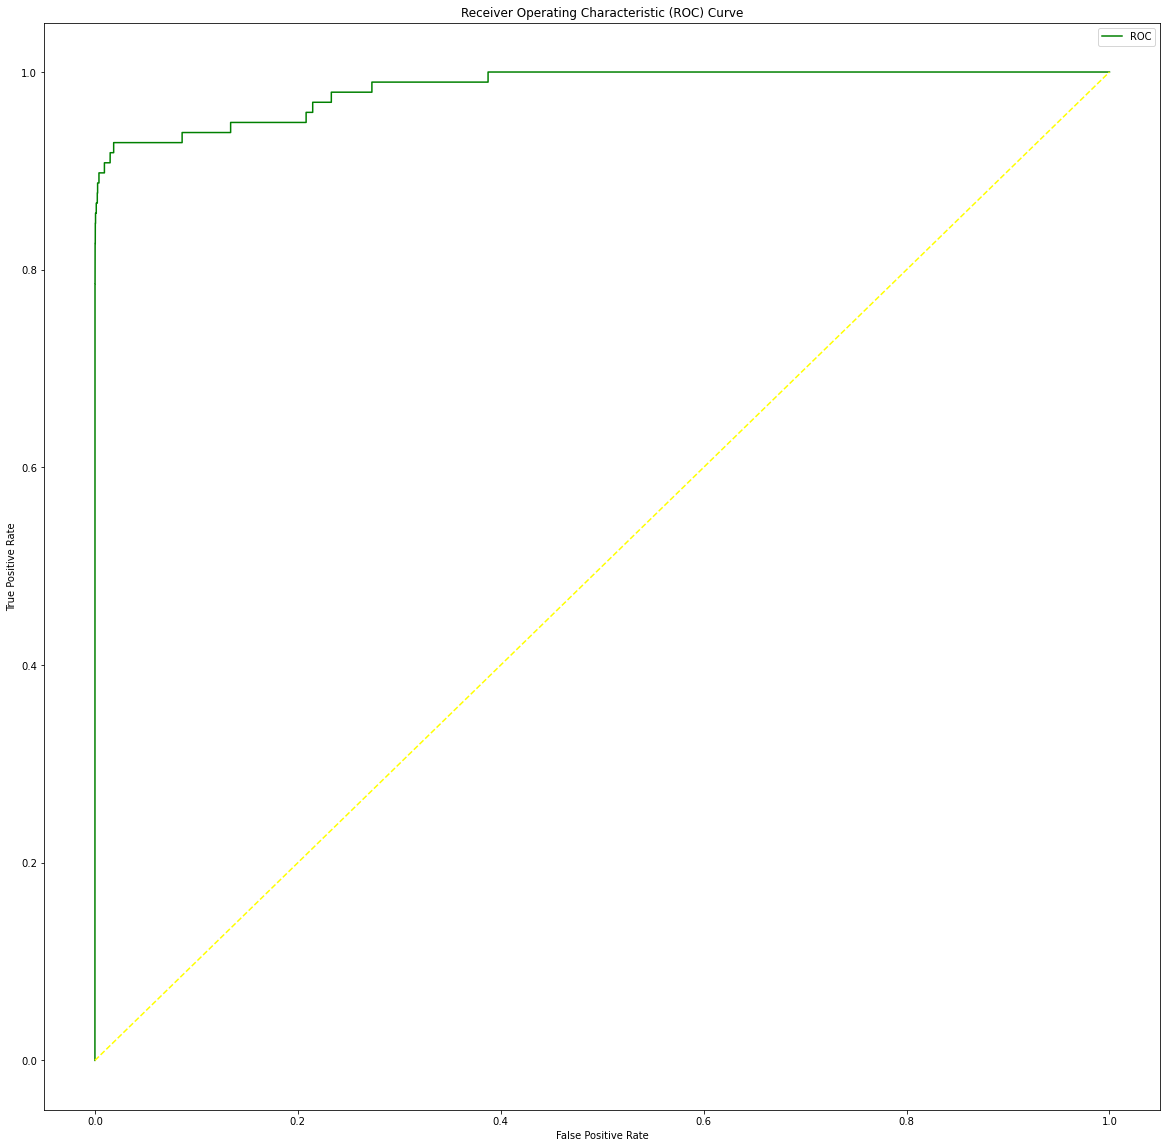

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.89      0.46        98

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.73     56962
weighted avg       1.00      1.00      1.00     56962



0.9837300670127365

In [103]:
clf_score_test(xgb_clf_smote)

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

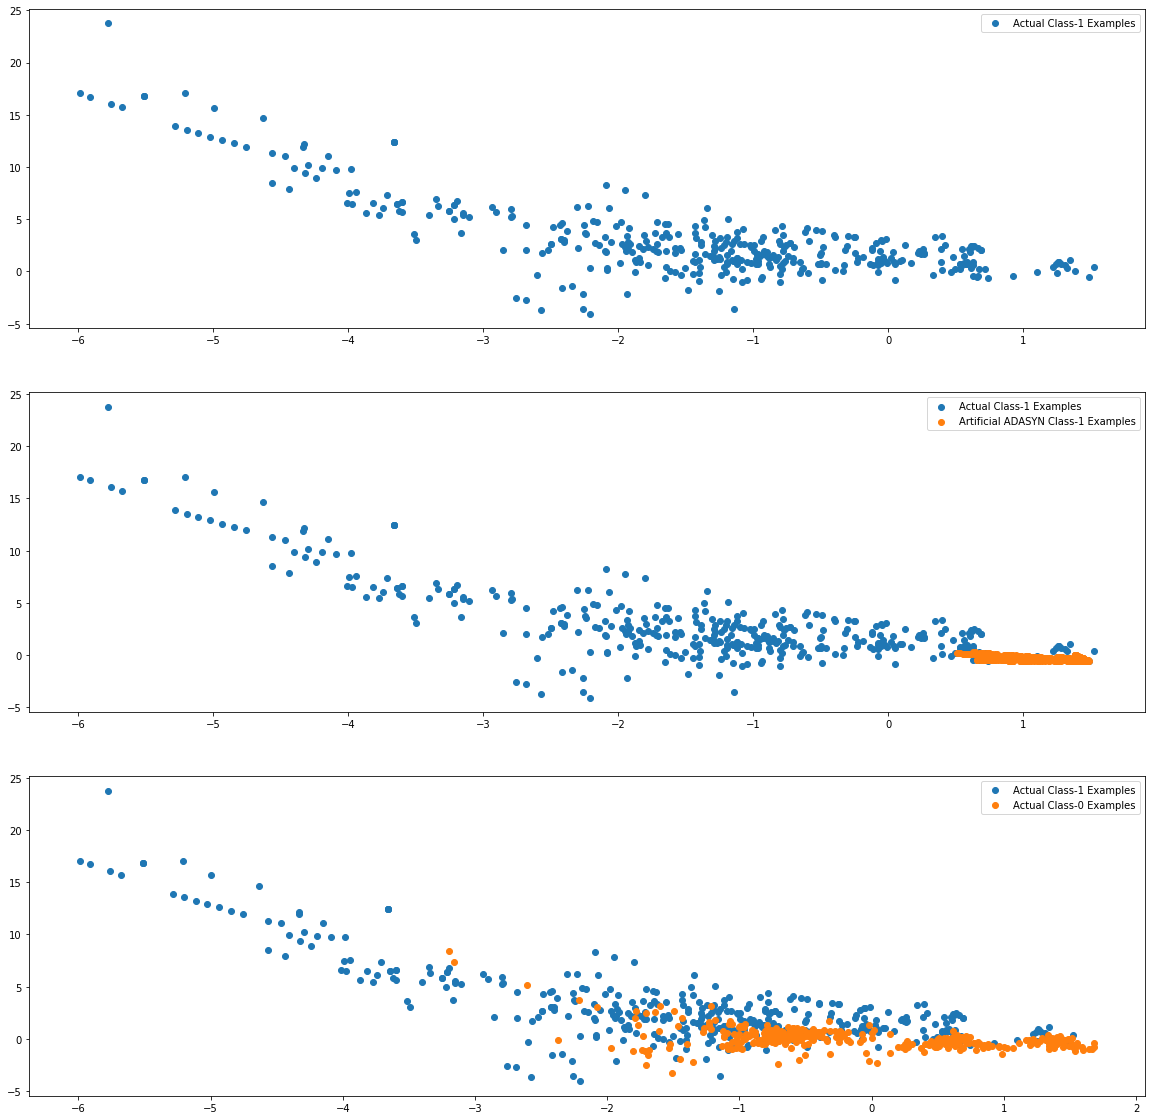

In [105]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [106]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('Resampled dataset :-',Counter(y_train_adasyn))
print(X_train_adasyn.shape)
print(y_train_adasyn.shape)

Before sampling class distribution:- Counter({0: 227451, 1: 394})
Resampled dataset :- Counter({1: 227453, 0: 227451})
(454904, 29)
(454904,)


### Logistic Regression with ADASYN

In [108]:
#Logistic regression with SMOTE

AUC: 0.99


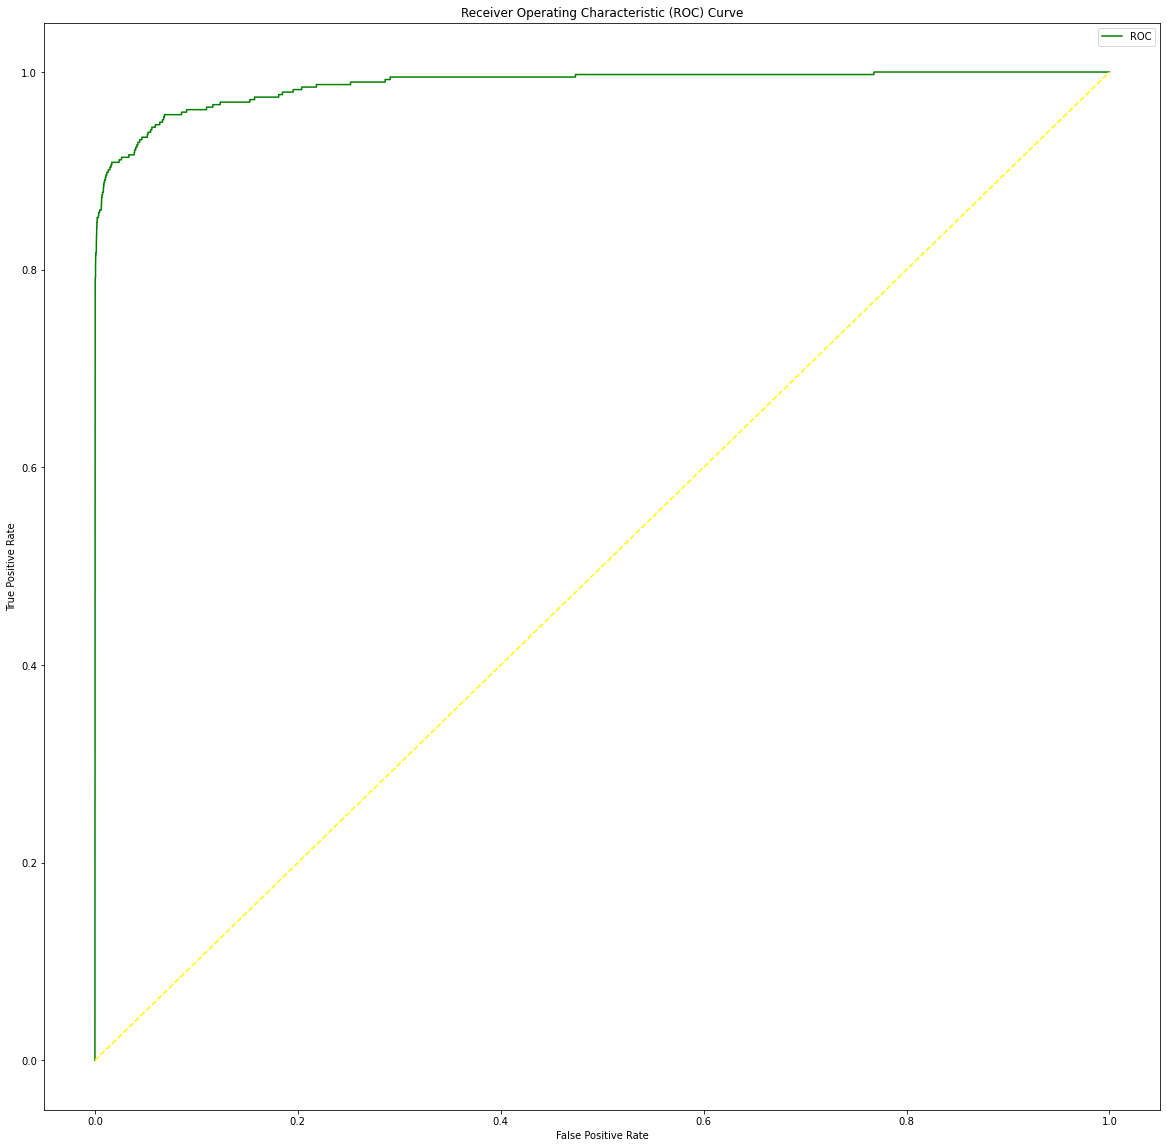

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    227451
           1       0.02      0.96      0.03       394

    accuracy                           0.91    227845
   macro avg       0.51      0.93      0.49    227845
weighted avg       1.00      0.91      0.95    227845



0.9871465482374103

In [109]:
lsr_best = LogisticRegression(C=0.01,random_state = 0)
lsr_clf_adasyn = lsr_best.fit(X_train_adasyn,y_train_adasyn)
clf_score_train(lsr_clf_adasyn)

#### Evaluate model on Test Data:

AUC: 0.98


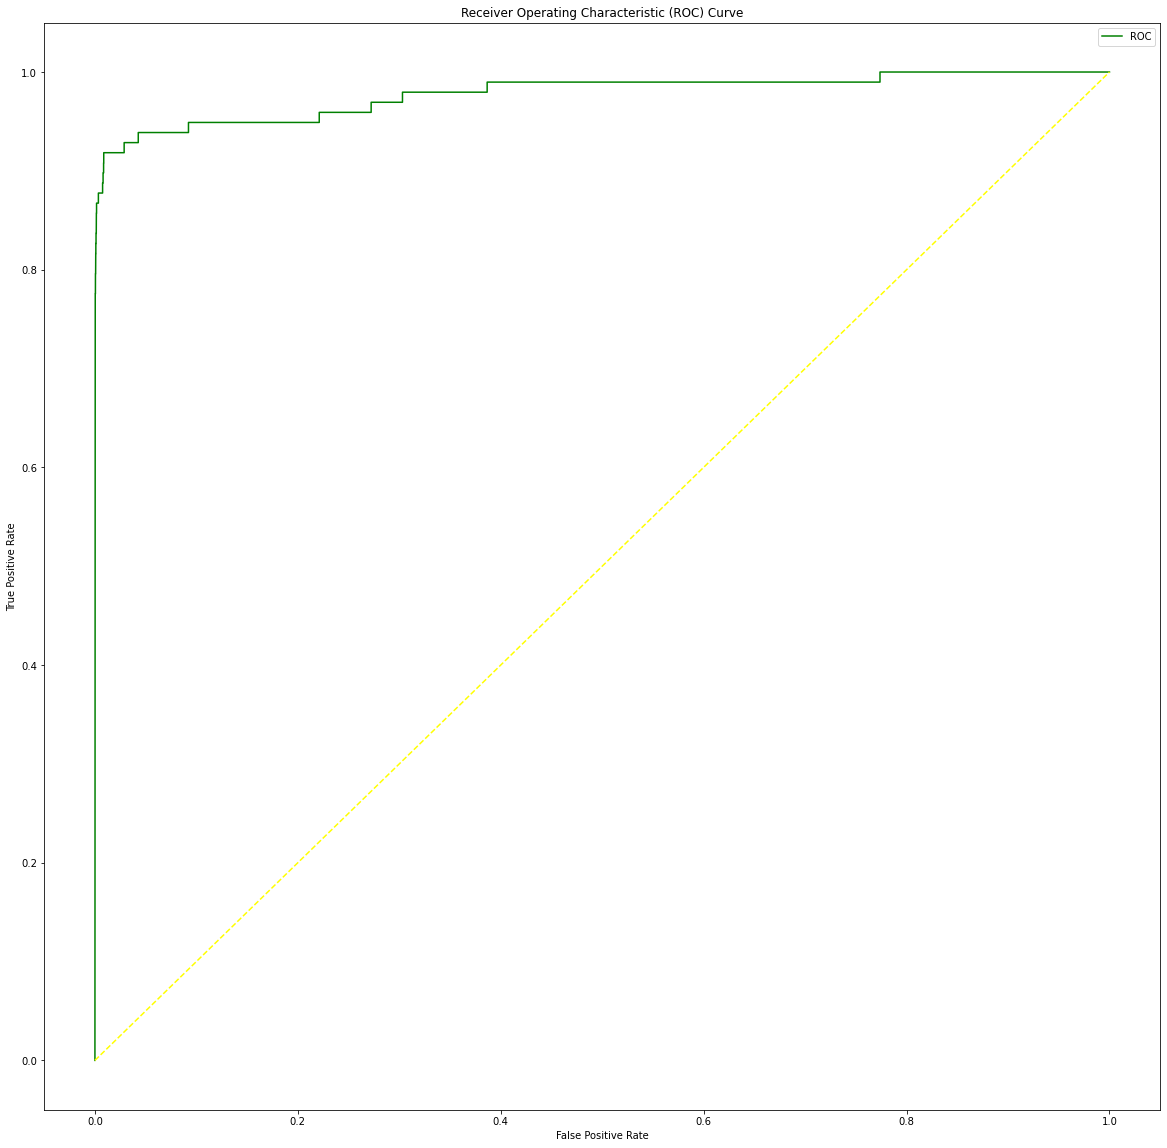

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



0.9778110034109311

In [110]:
clf_score_test(lsr_clf_adasyn)

### Decision Tree with ADASYN

In [111]:
dt_best = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_clf_adasyn = dt_best.fit(X_train_adasyn, y_train_adasyn)

AUC: 0.97


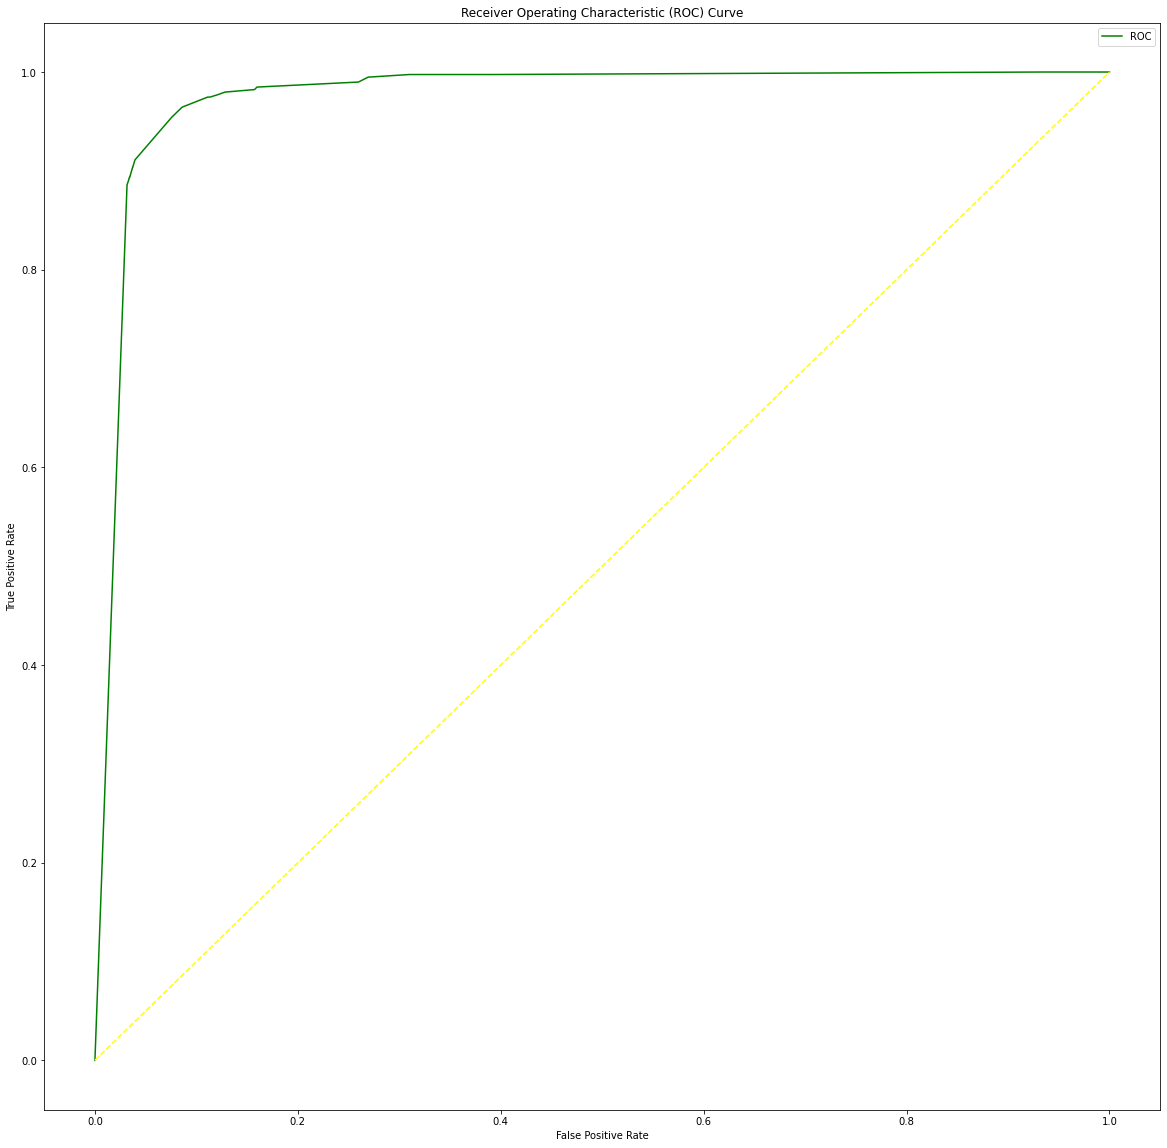

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    227451
           1       0.01      0.97      0.03       394

    accuracy                           0.89    227845
   macro avg       0.51      0.93      0.49    227845
weighted avg       1.00      0.89      0.94    227845



0.974567730290634

In [112]:
clf_score_train(dt_clf_adasyn)

#### Evaluate model on Test Data:

AUC: 0.95


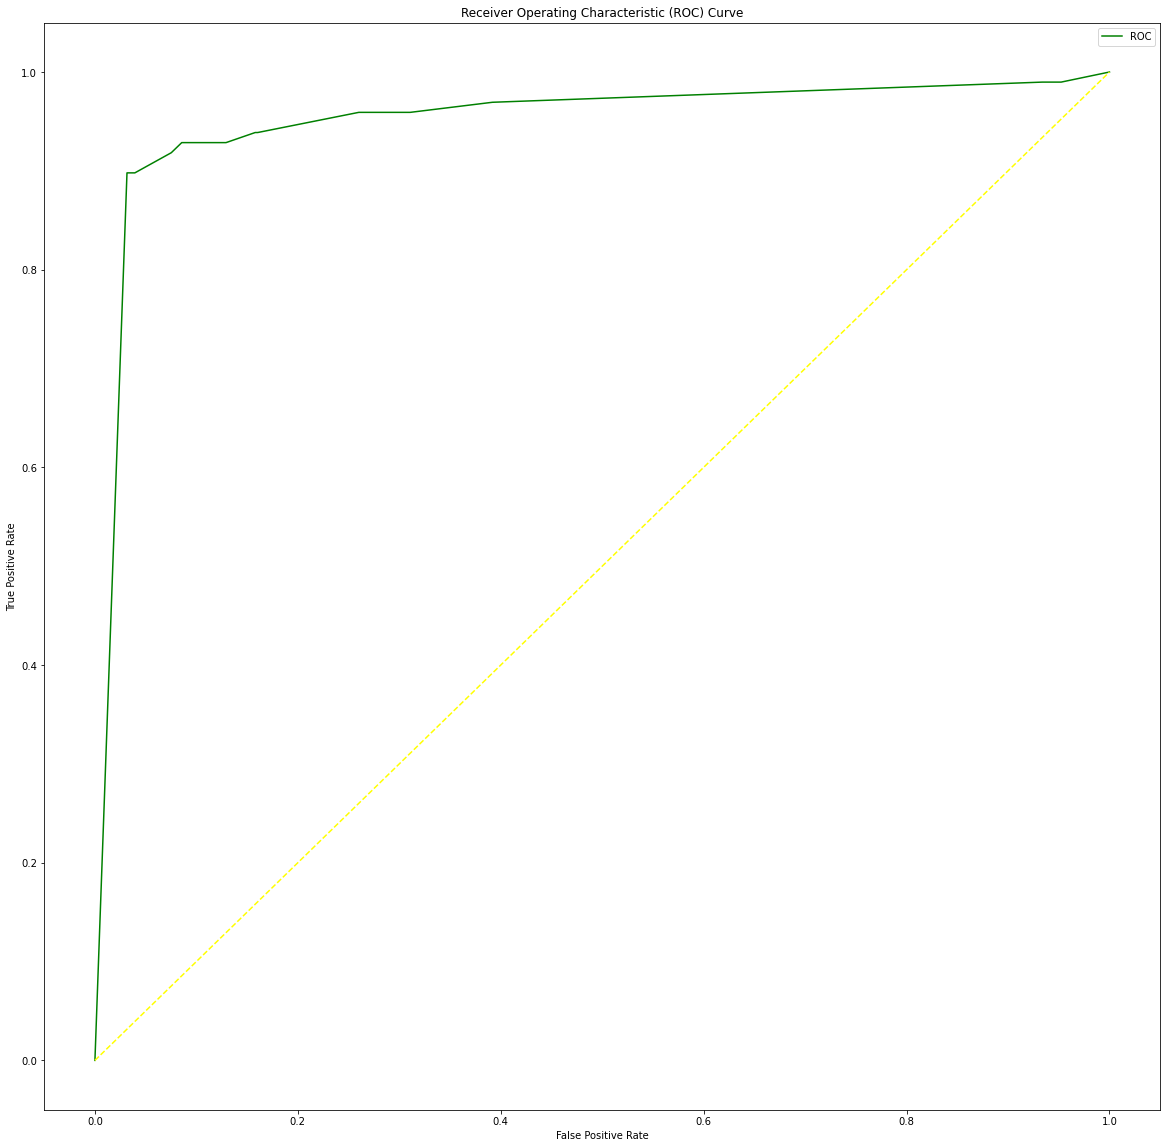

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      0.93      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.91      0.48     56962
weighted avg       1.00      0.89      0.94     56962



0.9509923605767574

In [113]:
clf_score_test(dt_clf_adasyn)

AUC is higher in SMOTE by a small margin but Recall is better in ADASYN than SMOTE.
The Precision is extremely low in both, resulting in low f1-score. So the model is not good enough.

### Random Forest with ADASYN

In [114]:
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=9, n_estimators=50,max_features=20)

In [115]:
rfc_clf_adasyn = rfc_best.fit(X_train_adasyn, y_train_adasyn)

AUC: 1.00


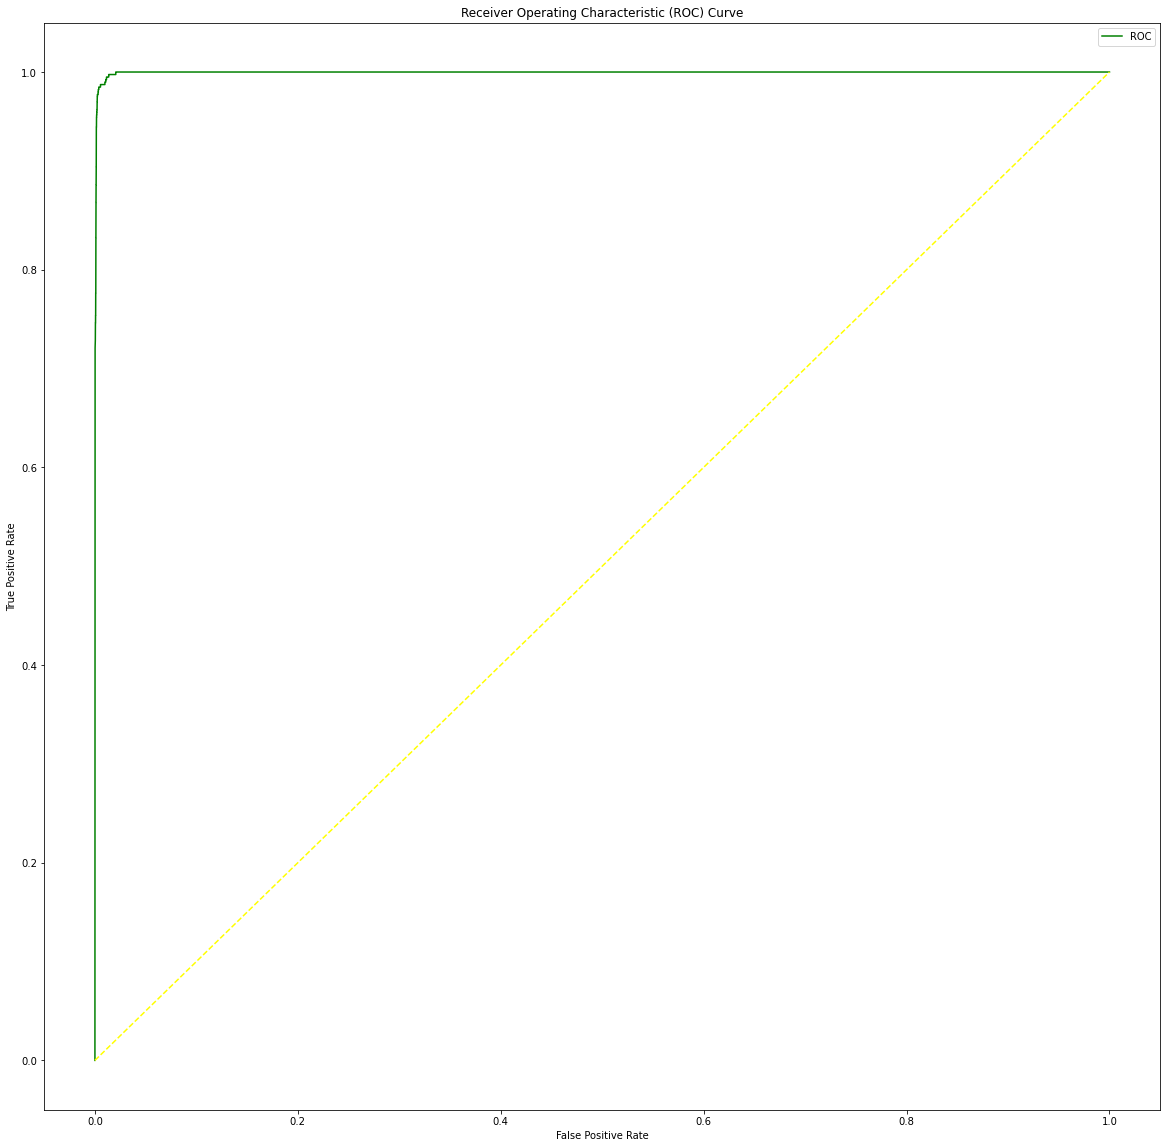

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      1.00      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.99      0.55    227845
weighted avg       1.00      0.97      0.98    227845



0.9994533937325755

In [116]:
clf_score_train(rfc_clf_adasyn)

#### Evaluate model on Test Data:

AUC: 0.98


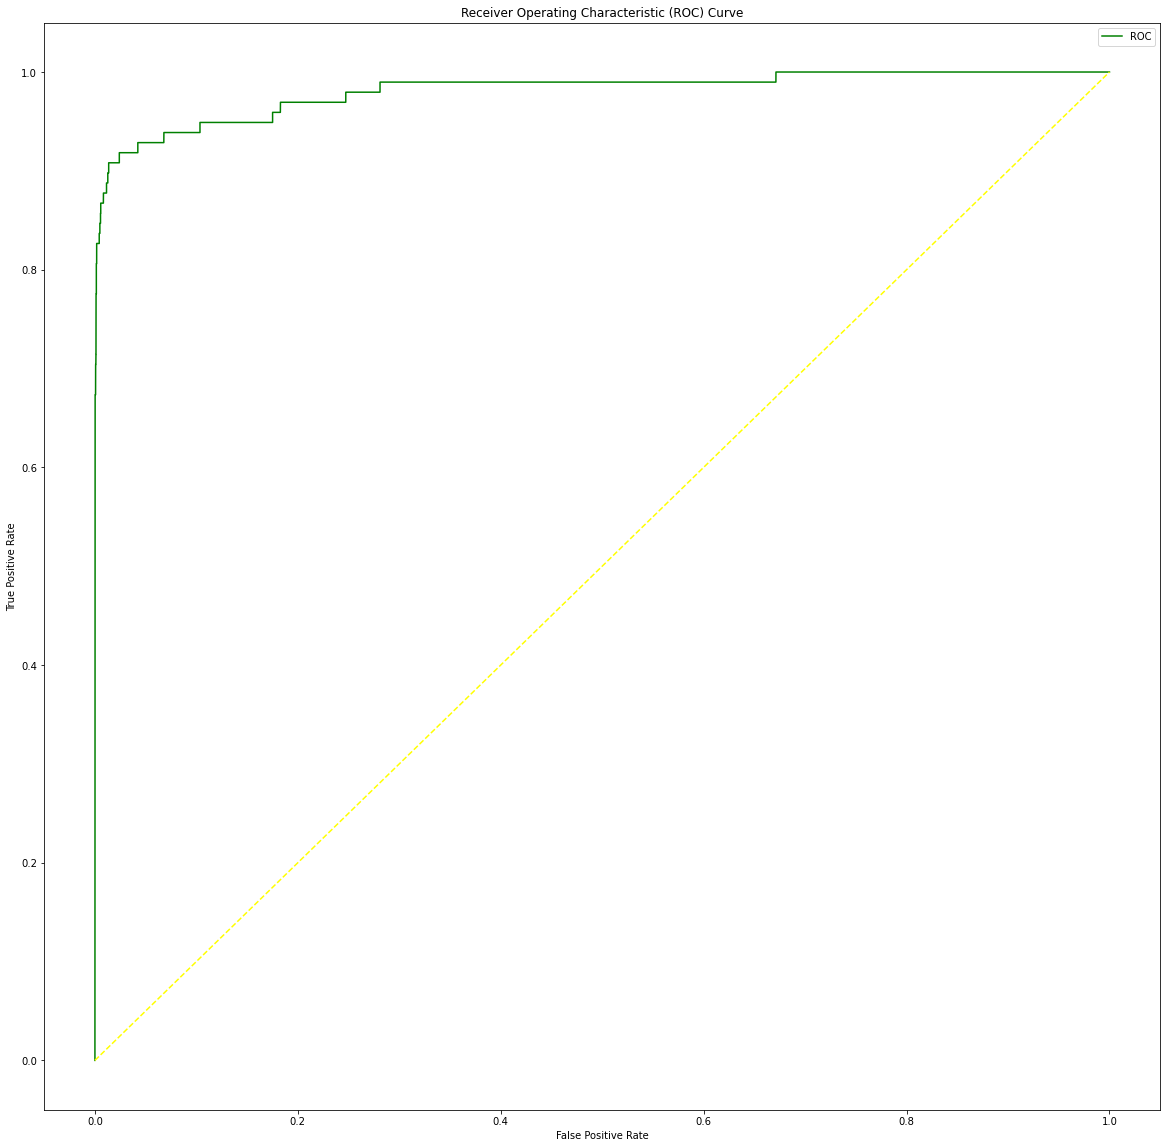

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



0.9807787000562747

In [117]:
clf_score_test(rfc_clf_adasyn)

Random Forest performs better on SMOTE.
Both AUC and Recall for Fraud transactions are better on ADASYN sampled data, but Precision is extremely low.
Where as in SMOTE we have a fair precision with good recall resulting in a fair f1-score(0.39).

### XGBoost with ADASYN

[09:24:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 1.00


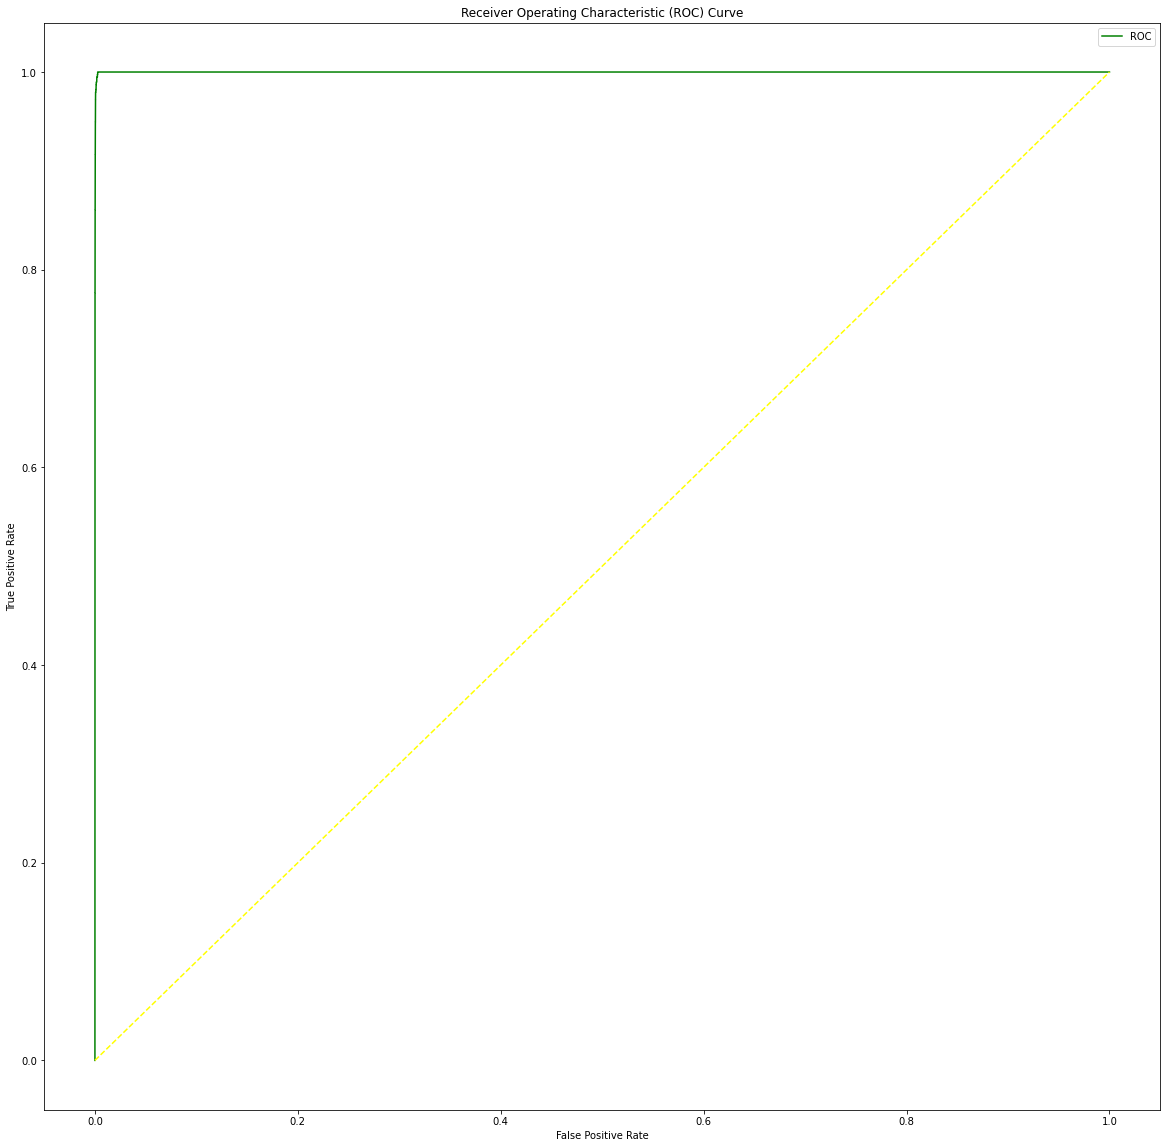

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.21      1.00      0.35       394

    accuracy                           0.99    227845
   macro avg       0.61      1.00      0.67    227845
weighted avg       1.00      0.99      1.00    227845



0.9998948844830684

In [118]:
xgbest = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=2)

xgb_clf_adasyn = xgbest.fit(X_train_adasyn,y_train_adasyn)

#Plotting ROC
clf_score_train(xgb_clf_adasyn)

#### Evaluate model on Test Data:

AUC: 0.99


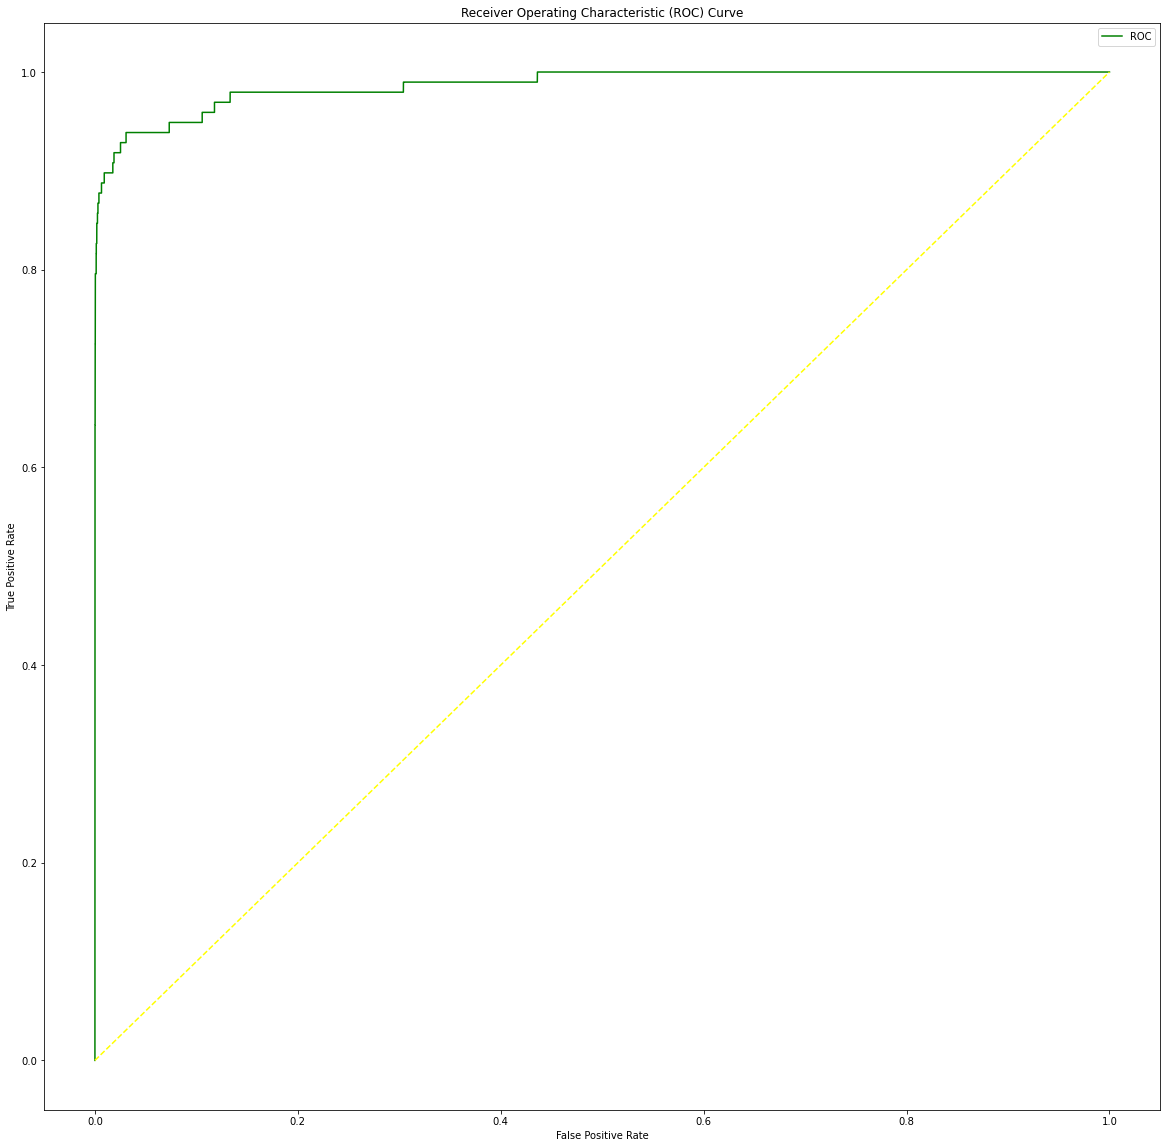

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.89      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



0.9867284491174072

In [119]:
clf_score_test(xgb_clf_adasyn)

AUC is better in case of ADASYN then smote.
With ADASYN XGBoost gives a better Recall but both have a low precision & f1-score.

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

 save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions but we can not have a very low precision.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


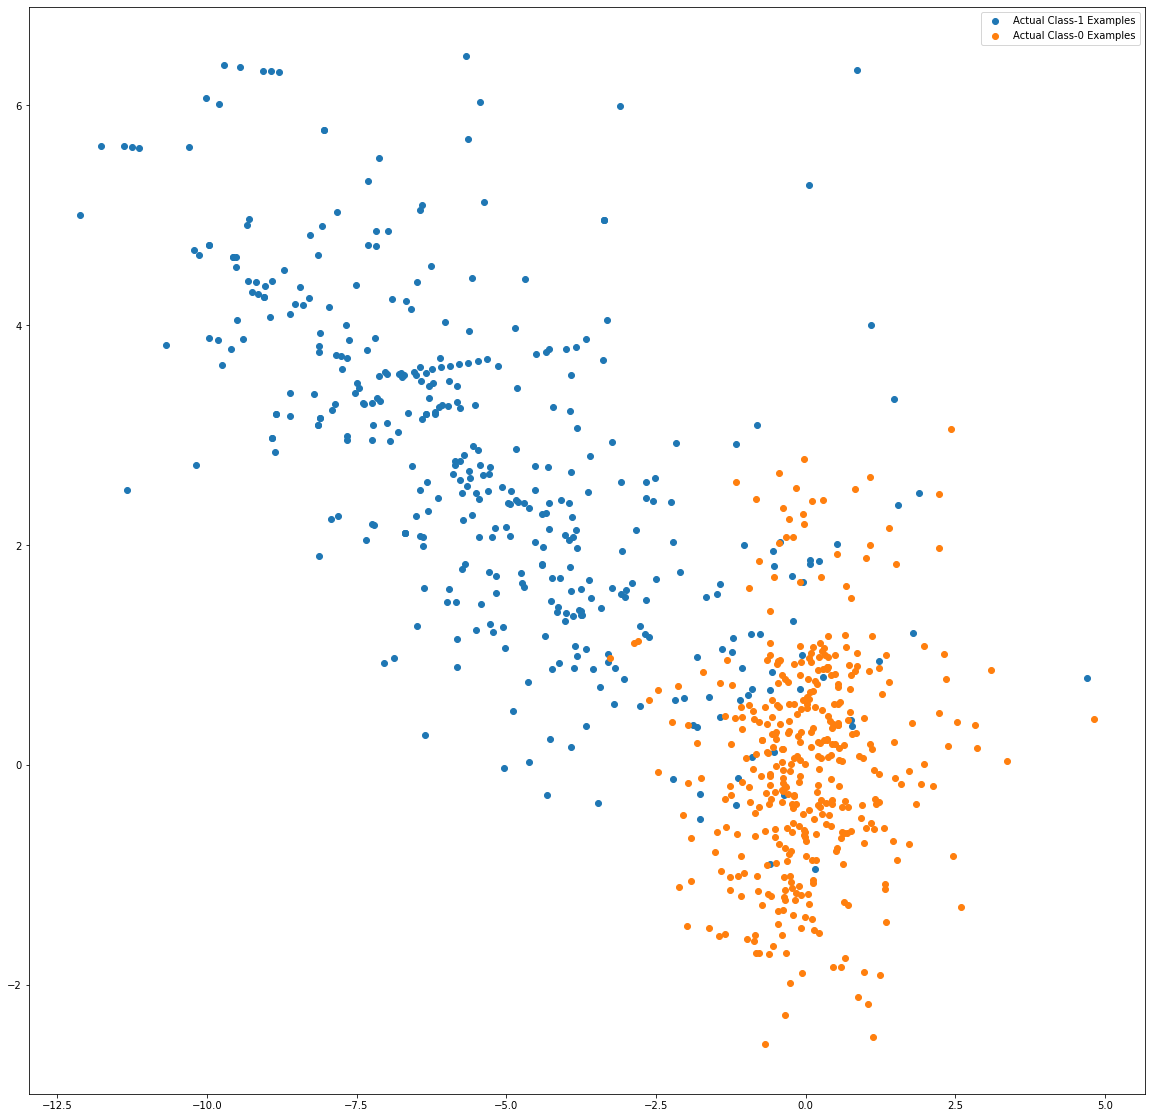

In [122]:
var_imp = []
for i in xgb_clf_over.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_clf_over.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_clf_over.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_clf_over.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_clf_over.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_clf_over.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [123]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [124]:
y_train_pred_proba = xgb_clf_over.predict_proba(X_train_over)[:,1]

In [126]:
print('Train auc =', metrics.roc_auc_score(y_train_over,y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_over,y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9994357


### Best model on the balanced data

We can see that almost all the models performed more or less good. we should be interested in the best model.

We balanced the data with several approach like Oversampling, SMOTE and Adasy. Every data balancing technique we build several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

SMOTE and Adasyn models performed well. Here XGBoost Oversampling has ROC score 1.0 in train set and .99 on test set.

Hence, we can conclude that the XGBoost model with Oversampling is the best model.

Comparing both we can see that the XGBoost Oversampling model has more AUC score than RandomForest but the XGBoost Oversampling model has a better f1-score (Result of better precision and recall). 


### Summary

Here, To save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions but we can not have a very low precision.

For banks with a smaller average transaction value, you would want a high precision because you only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, you can add the human element to verify whether the transaction was made by calling the customer. However, when the precision is low such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So, consider the losses if the missed transaction was a high-value fraudulent one.

Here, to save banks from high-value fraudulent transactions, we need to focus on a high recall to detect actual fraudulent transactions.

After performing all models , we have seen that  XGBoost Oversampling mode has good ROC score and also high recall. 